In [6]:

current_folder=getwd()
dataset='CBF'

train_data_path=sprintf('%s/ClassificationData/%s/%s_TRAIN.txt',current_folder,dataset,dataset)


traindata=fread(train_data_path)

head(traindata)


trainclass=traindata[,1]

traindata=traindata[,2:ncol(traindata)]
print(dim(traindata)) 

tlength=ncol(traindata)
noftimeseries=nrow(traindata)


tree_nn=matrix(nrow = 30,ncol = 128)
genlass_nn=matrix(nrow = 30,ncol = 128)
tree_mse=matrix(nrow =30,ncol = 1 )
genlass_mse=matrix(nrow = 30,ncol = 1)


traindata[,id:=1:.N]
traindatalong=melt(traindata,id.vars='id')
traindatalong=as.data.table(traindatalong)
traindatalong[,time:=as.numeric(gsub("\\D", "", variable))-1]
traindatalong=traindatalong[,list(id,time,value)]
traindatalong=traindatalong[order(id,time)]

series_id=unique(traindatalong$id)





V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129
1,-0.4642765,-0.5550479,-0.84284310,-0.86589548,-0.9363963,-0.8172700,-0.2636122,-1.25804830,-1.2503934,...,-1.3310856,-1.0837000,-1.0179615,-0.9160287,-1.1342892,-0.9202237,-0.7893615,-0.6387058,-0.9636643,-1.24516910
1,-0.8969721,-0.6856855,-1.35138180,-1.45866680,-1.1653456,-1.4039293,-1.8217996,-0.83160109,-1.0163124,...,-1.0625534,-1.5686762,-1.3640403,-1.1551774,-0.9958611,-1.1637529,-0.9165233,-0.5820981,-1.2590094,-1.39252410
1,-0.4646960,-0.5677389,-0.03202276,-0.63504562,-0.6028255,-0.2668563,-0.2670613,-0.93104230,-0.4493819,...,-0.2867213,-0.6371576,-0.1552602,-0.6881293,-0.8856088,-0.7662393,-0.8653152,-0.2844857,-0.6878891,-0.88760835
3,-0.1871897,-0.6208077,-0.81566070,-0.52139796,-0.7904229,-0.9675174,-1.4870063,-0.27788714,-0.8350747,...,-0.9086154,-0.7262865,0.1837776,-0.7374441,-1.1139967,-0.3939866,-0.5878895,-0.6082319,-0.6364646,-0.34902865
2,-1.1360166,-1.3191953,-1.84462380,-0.78869178,-0.2517154,-1.4876032,-0.6687641,-0.34036037,-1.0463815,...,-1.1829110,-1.0735136,-1.6113624,-1.0643404,-0.9707364,-0.8272809,-0.9535377,-1.2701854,-1.7427579,-0.92594391
2,-0.5687087,-0.8881180,-0.04797658,-0.03803611,-0.4830683,-1.0946887,-0.9534529,-0.03000688,-0.7954546,...,-0.9907398,0.5183746,-0.2285628,-0.5652887,-0.6429980,-1.1094278,-0.1010932,-0.2339490,-0.6198269,-0.08306189


[1]  30 128


Data Manipulation and Checking
(also creating empty mse-coord matrixes for loop to fill below)


Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


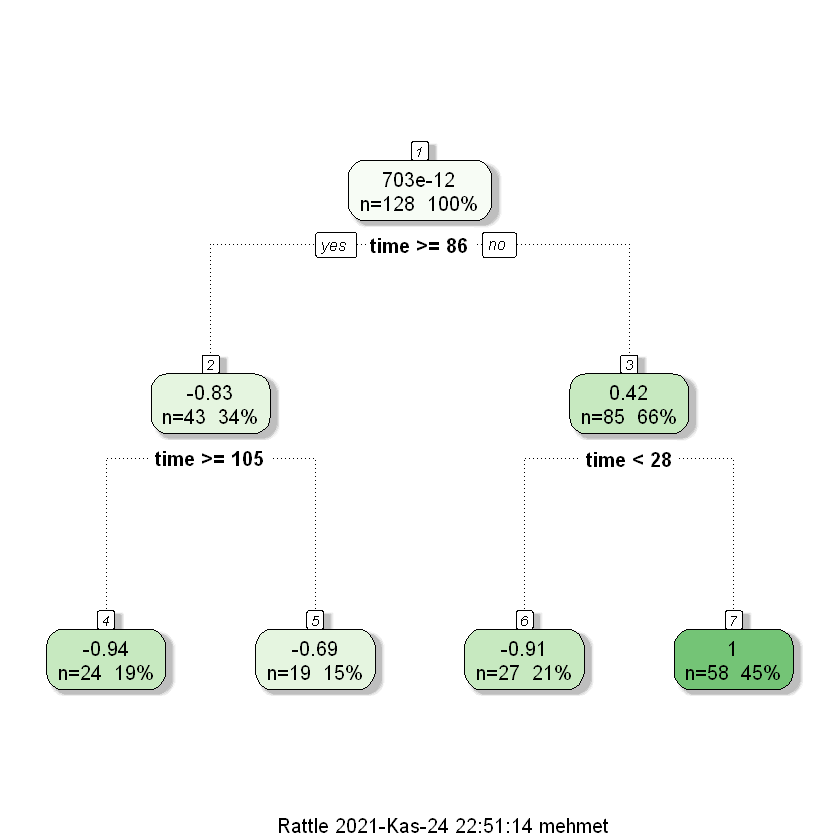

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


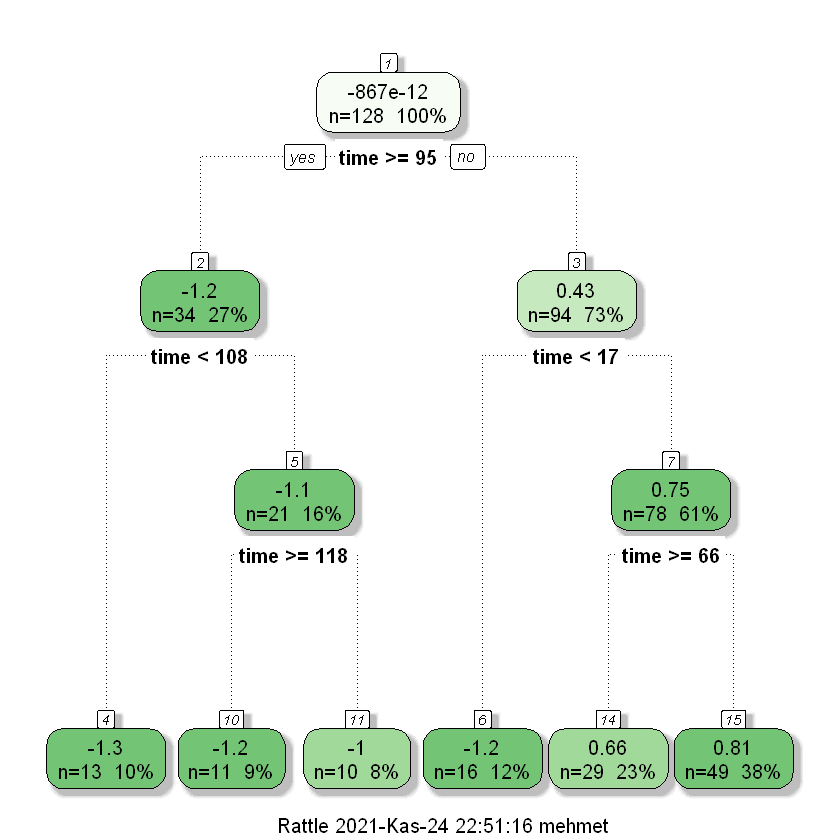

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


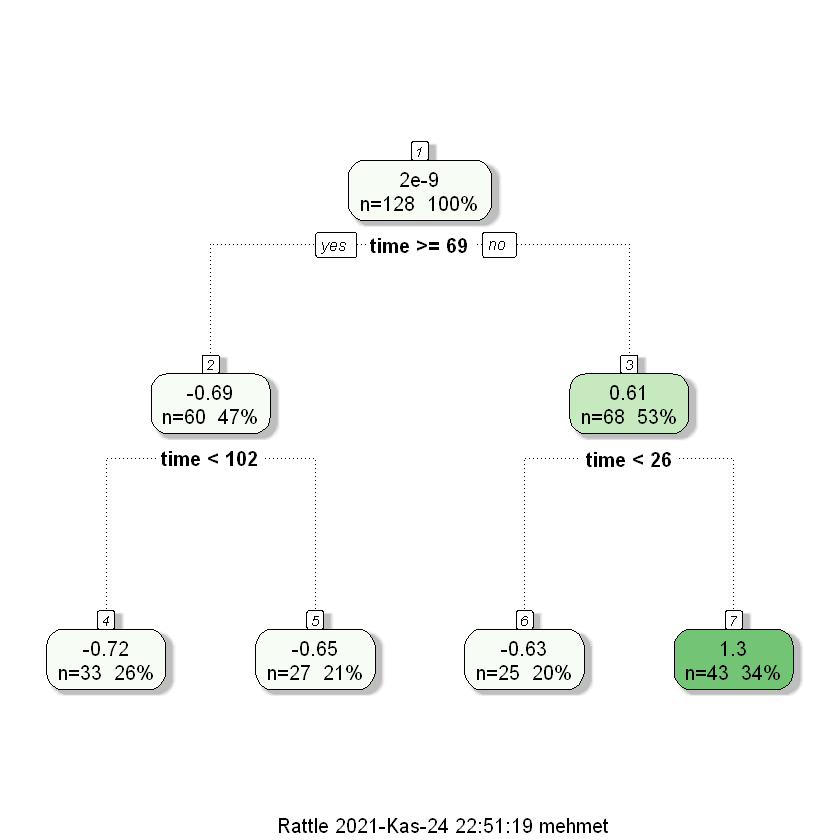

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


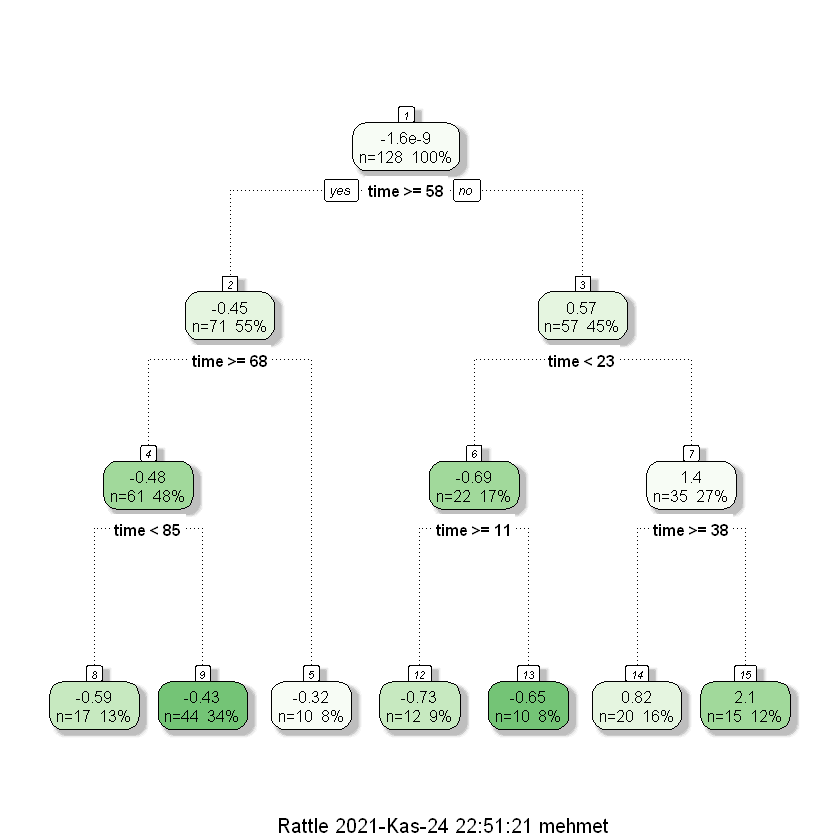

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


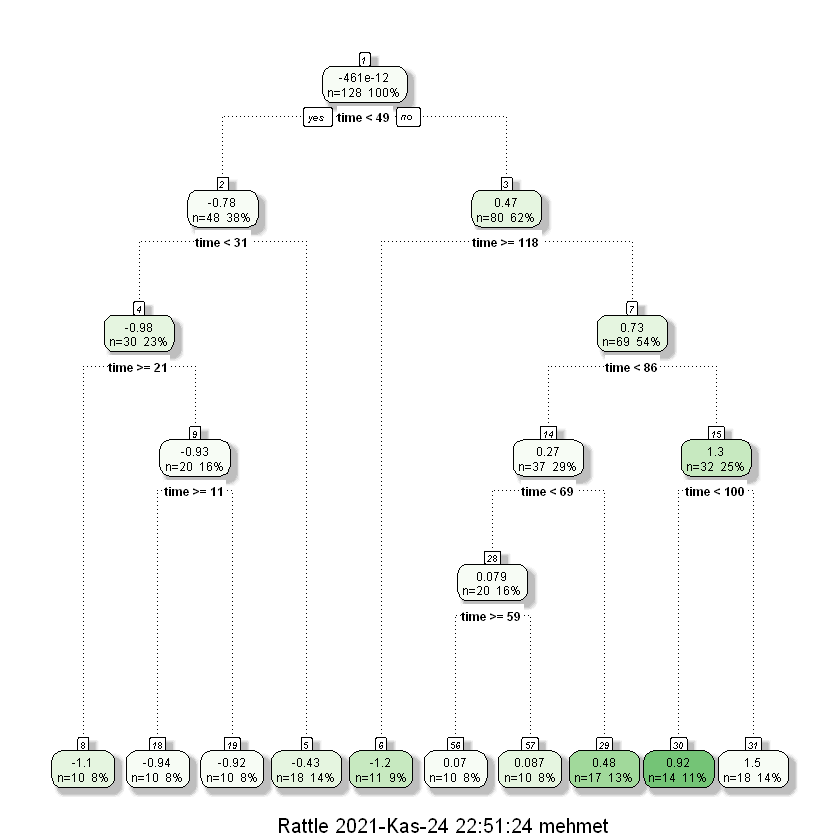

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


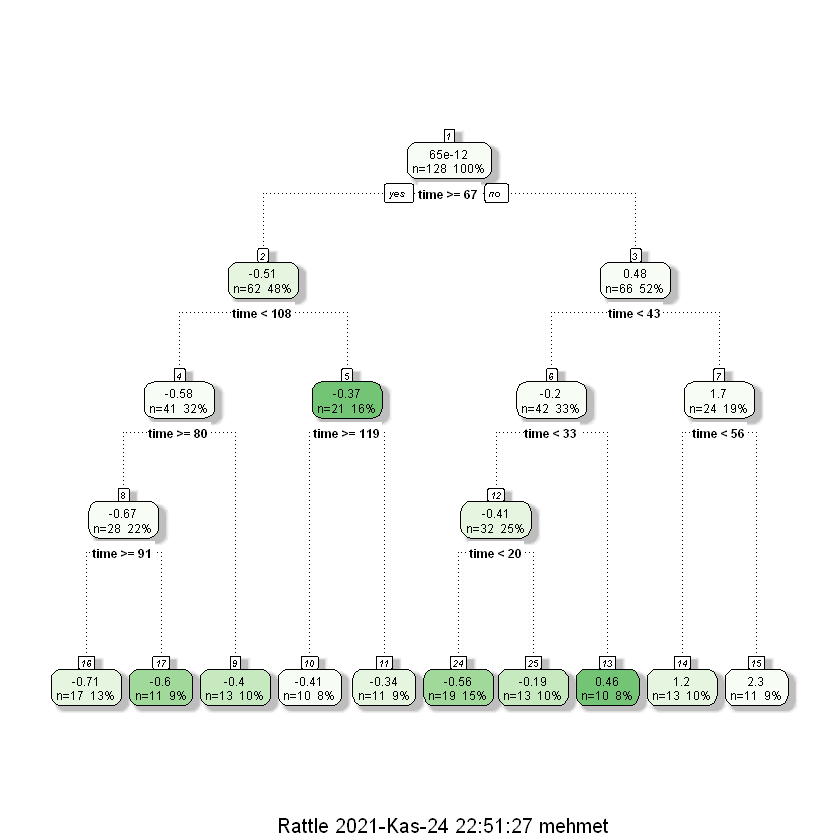

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


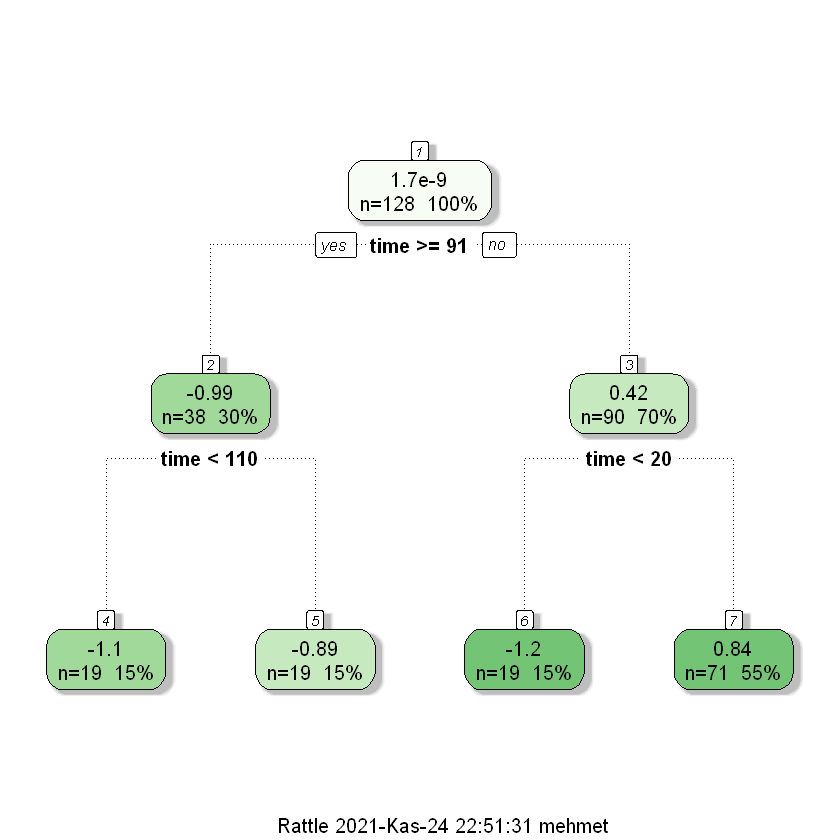

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


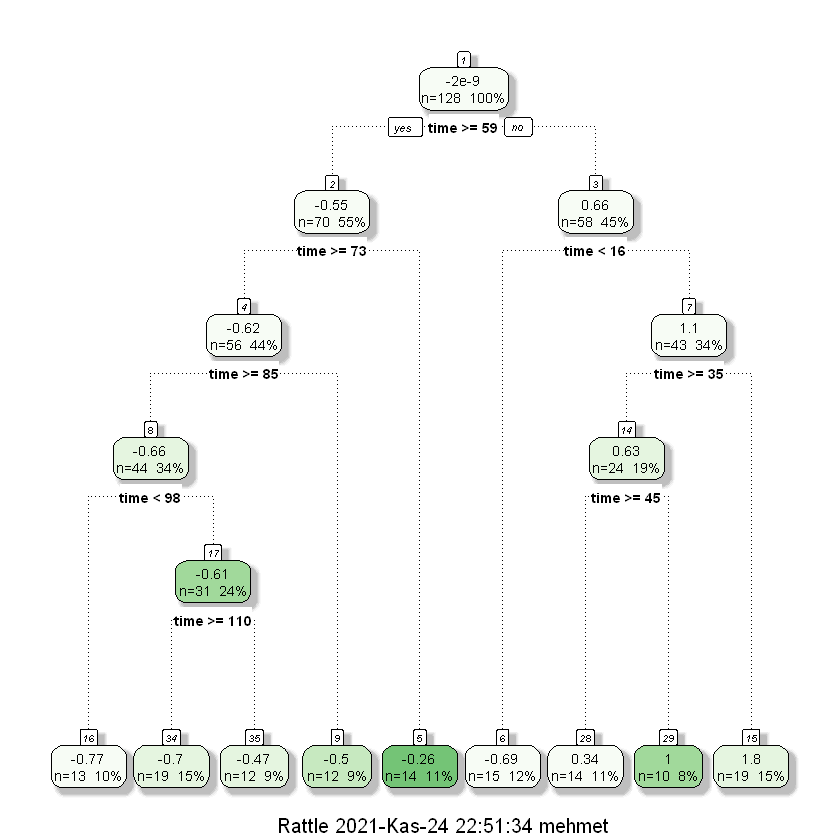

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


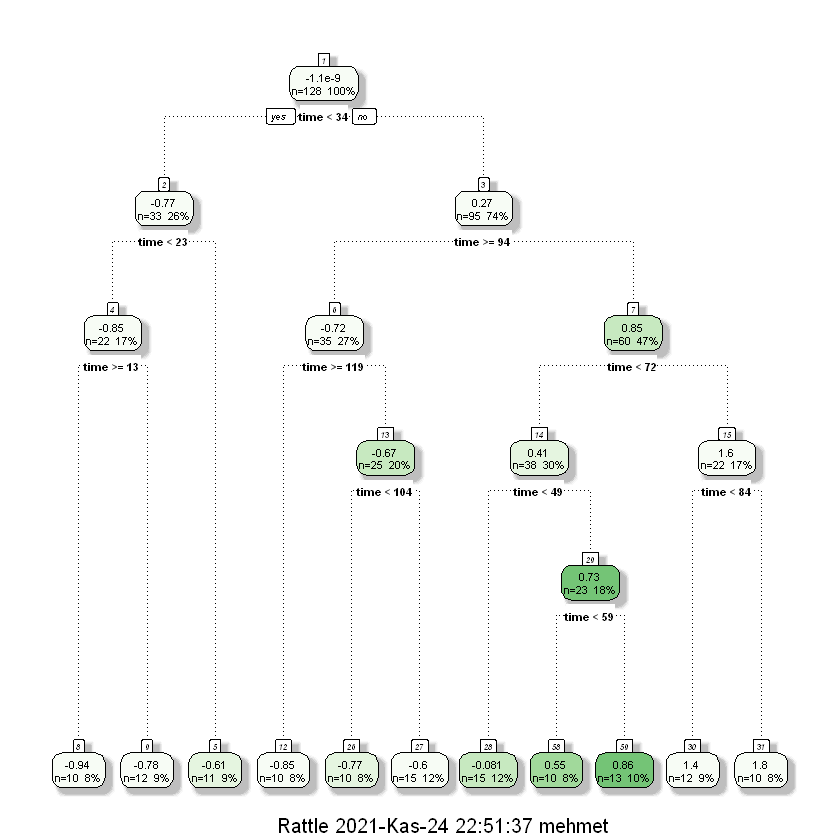

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


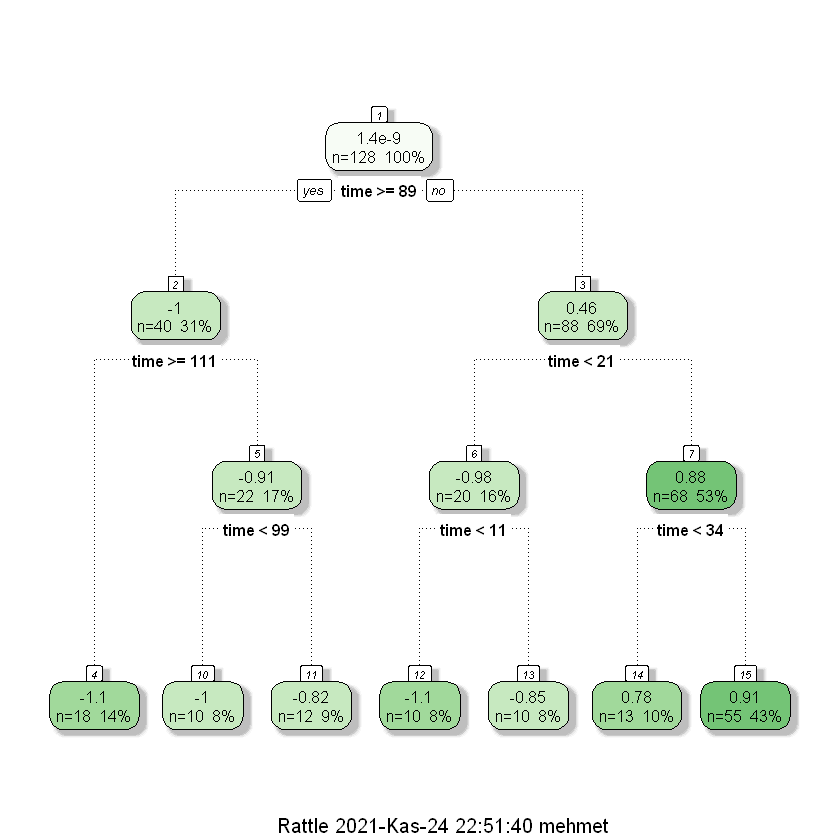

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


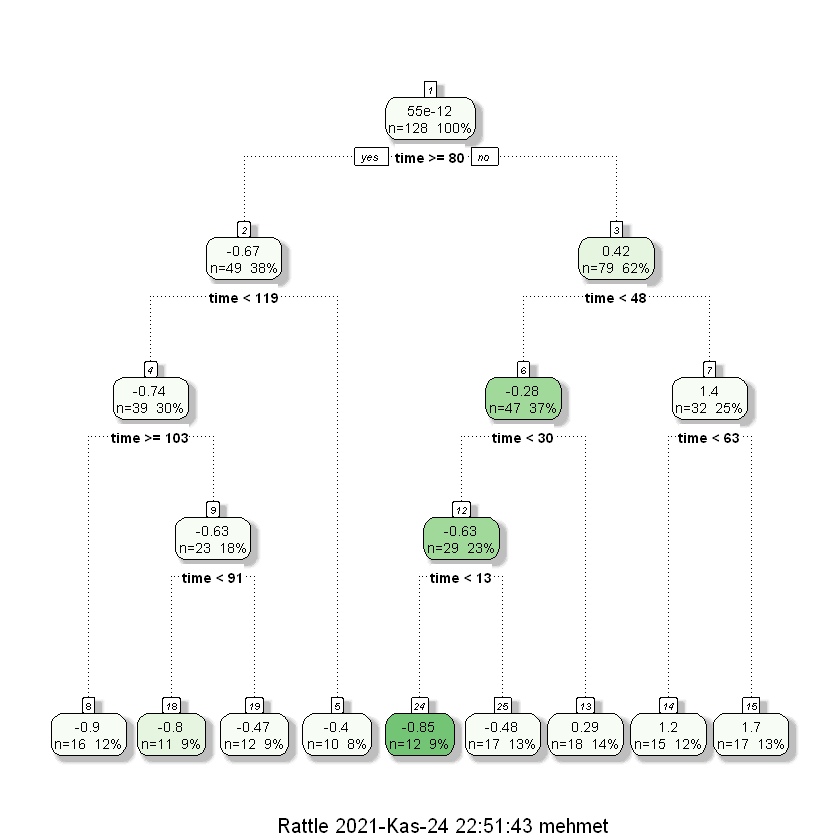

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


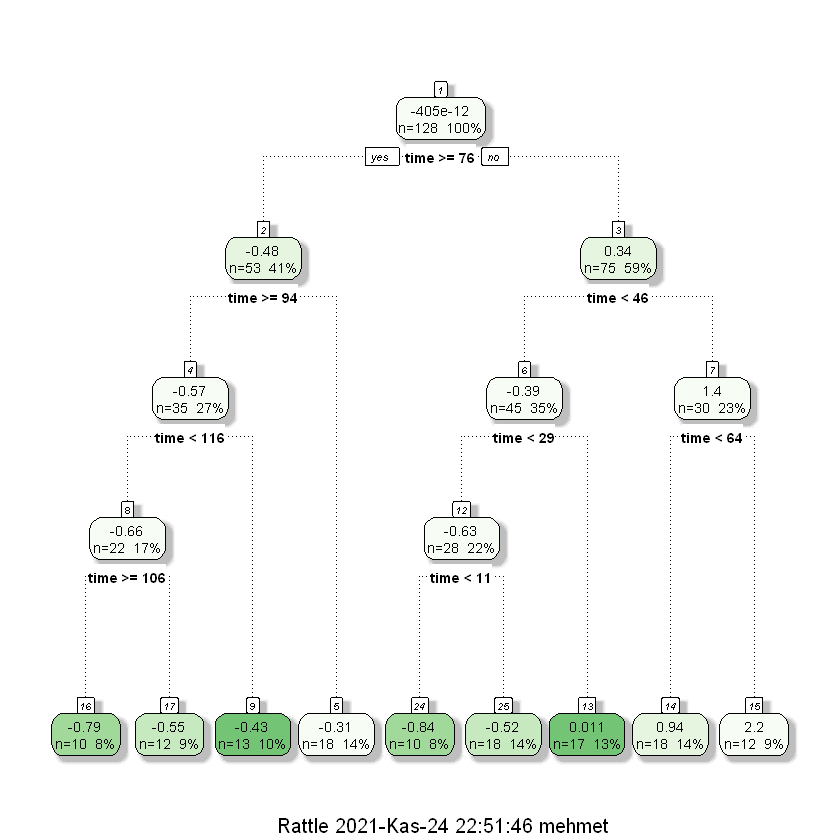

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


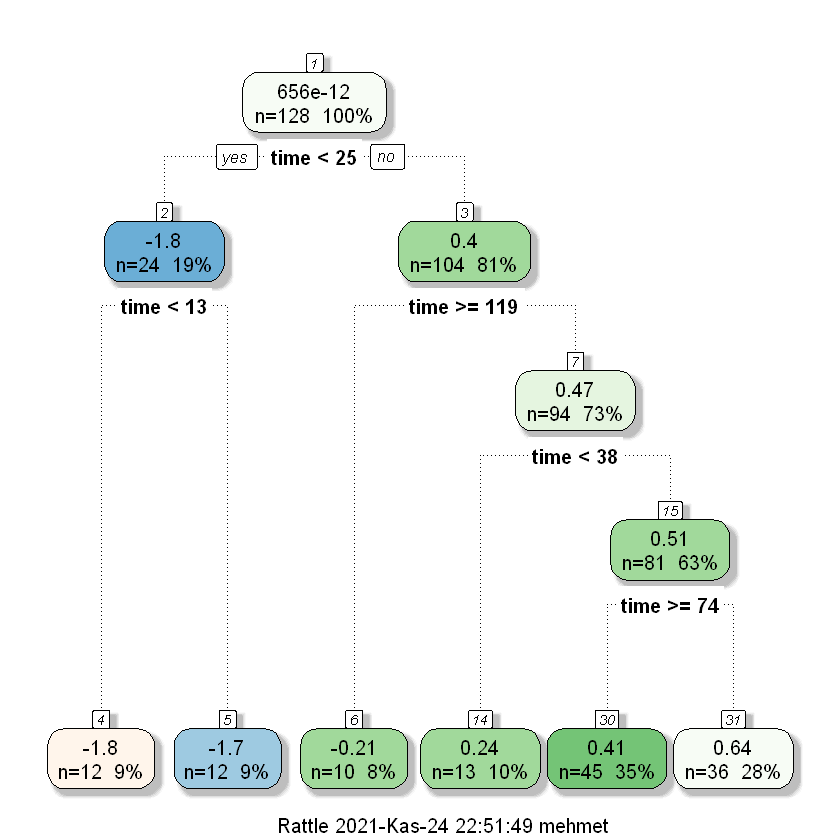

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


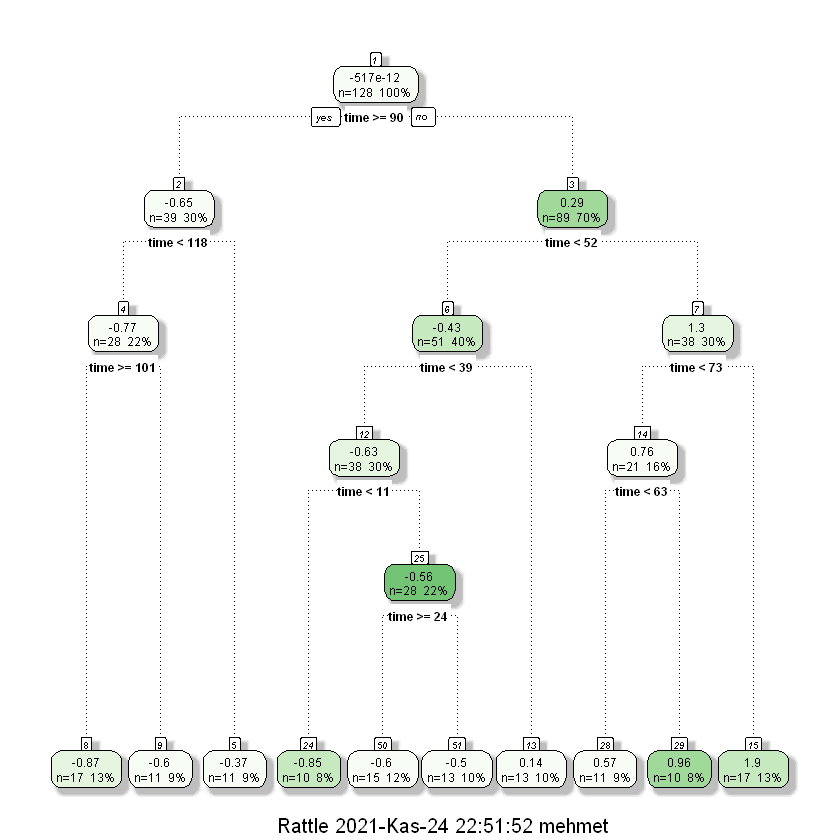

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


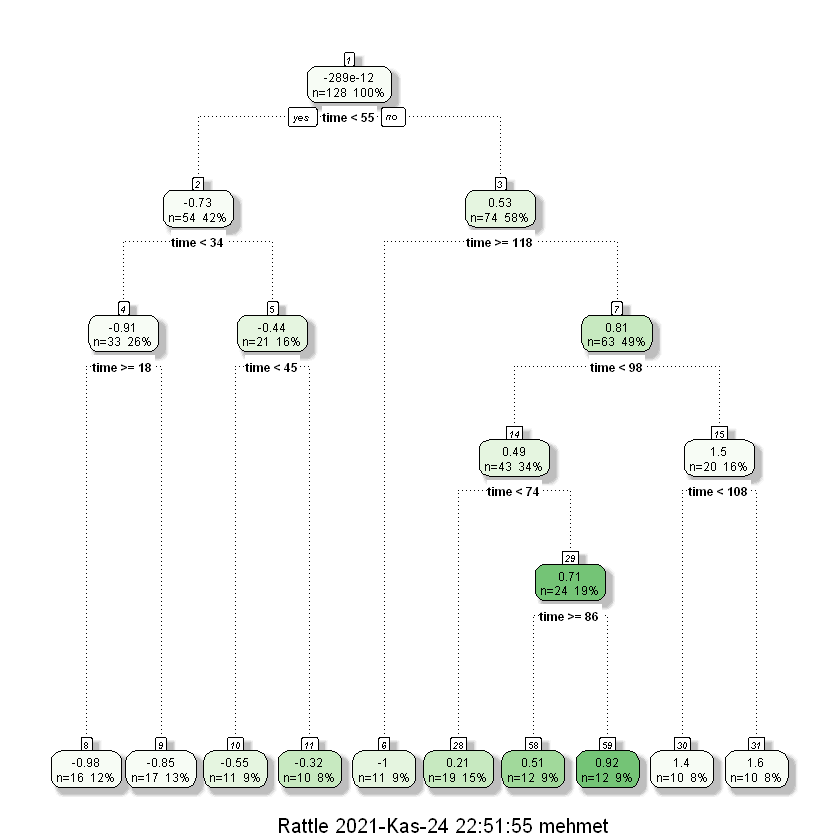

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


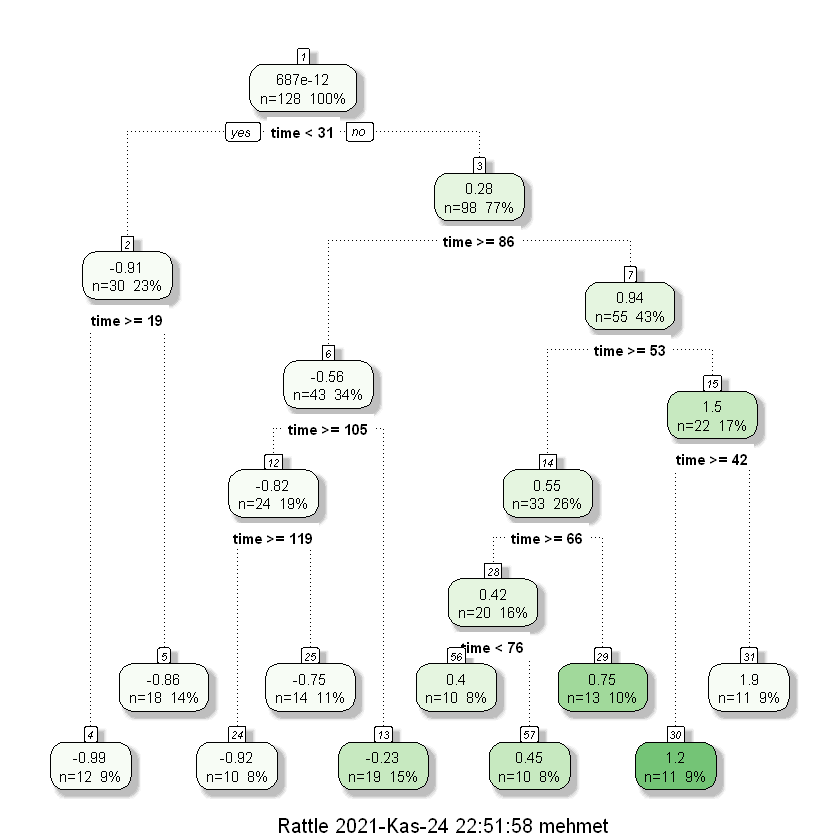

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


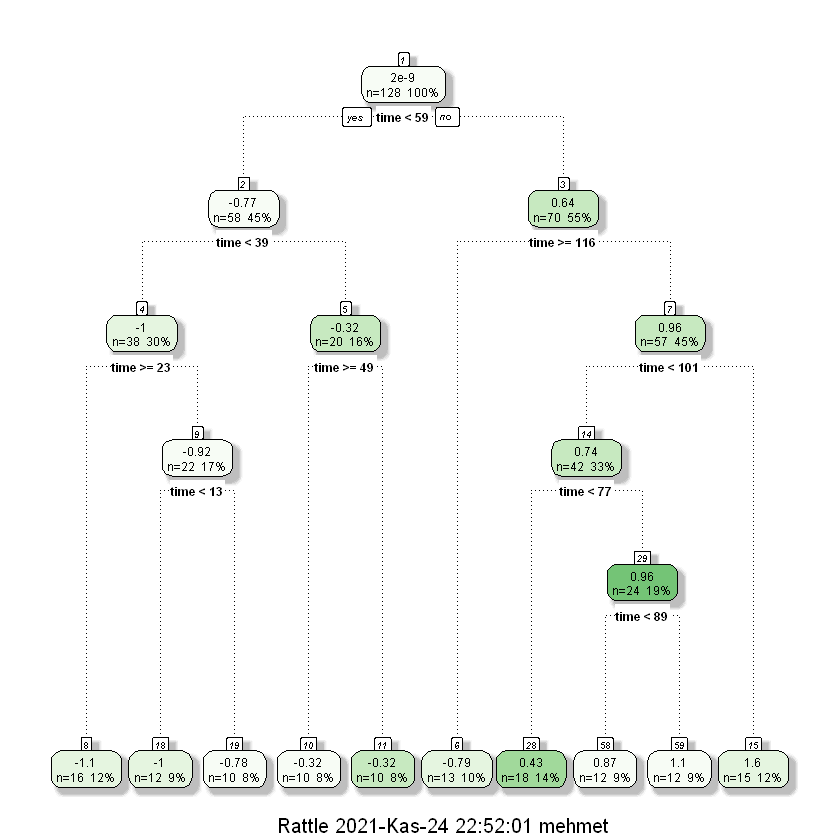

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


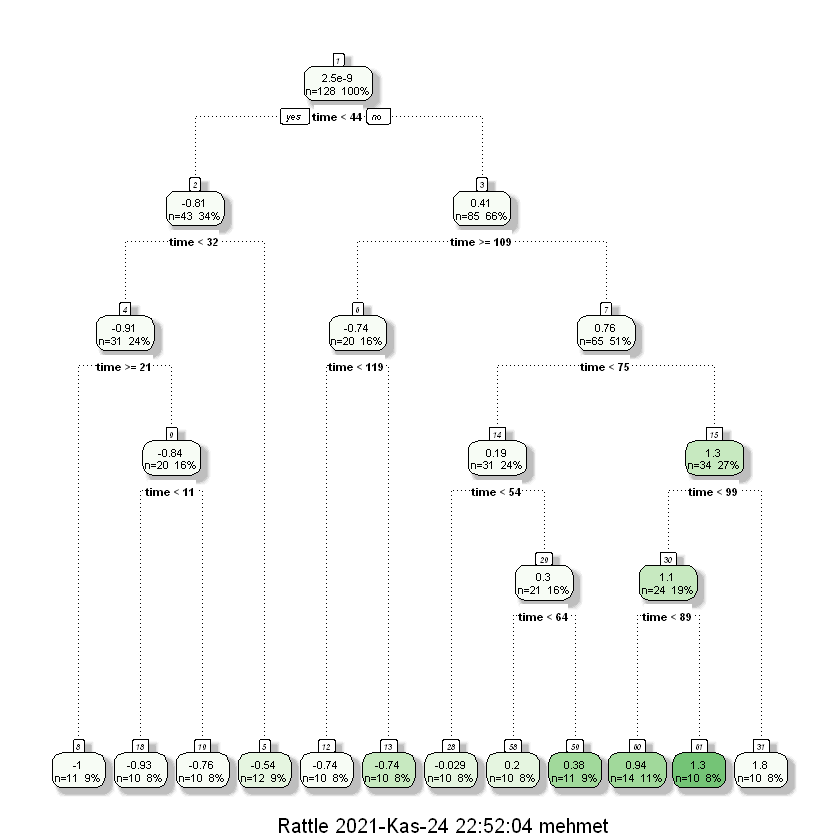

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


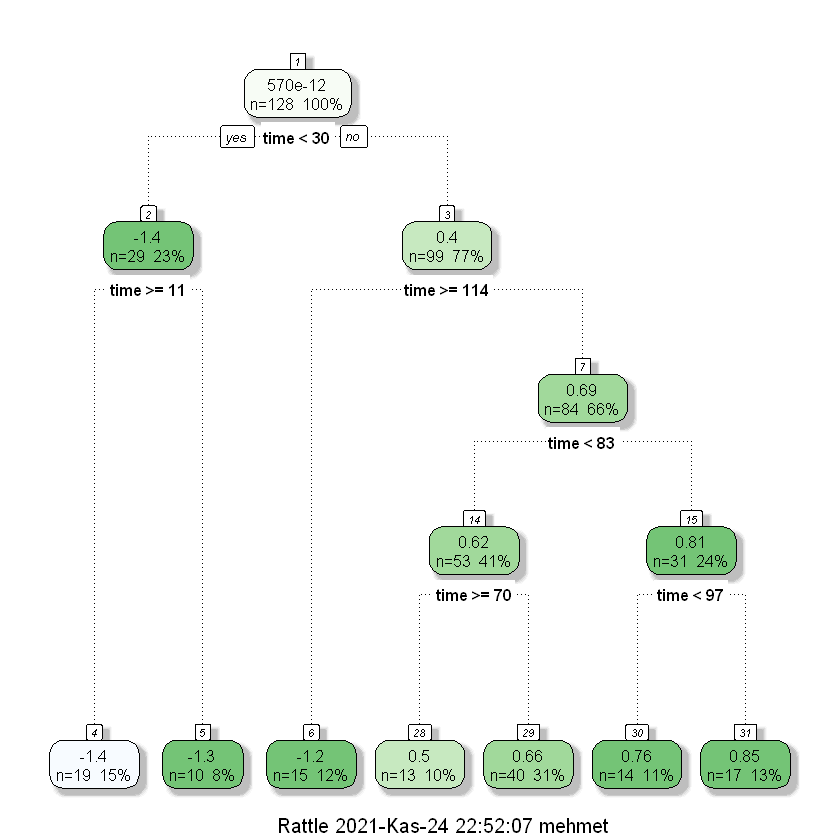

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


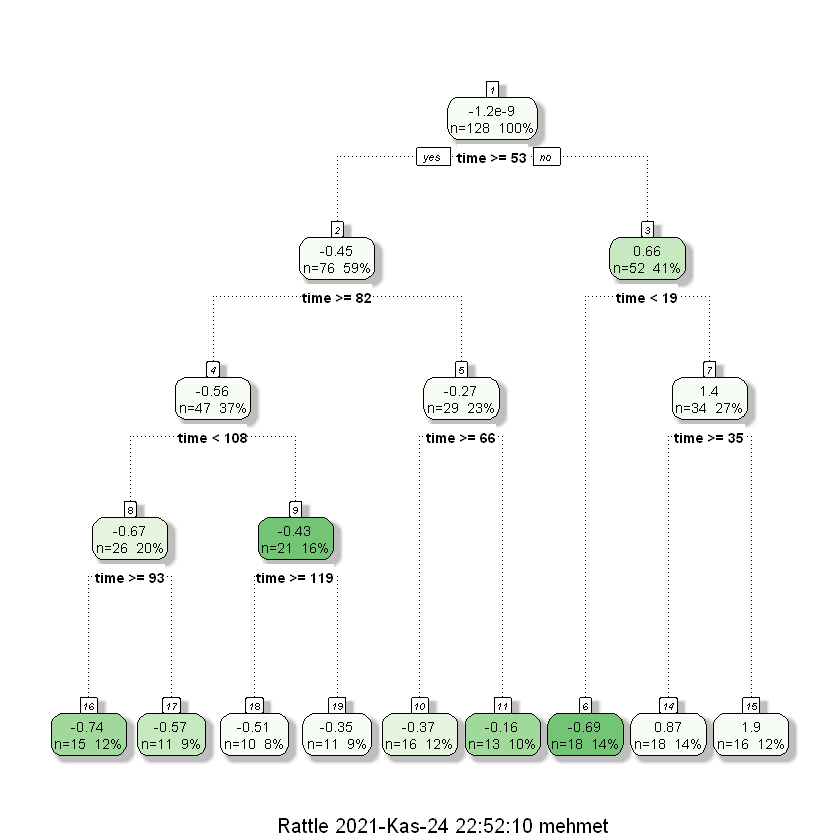

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


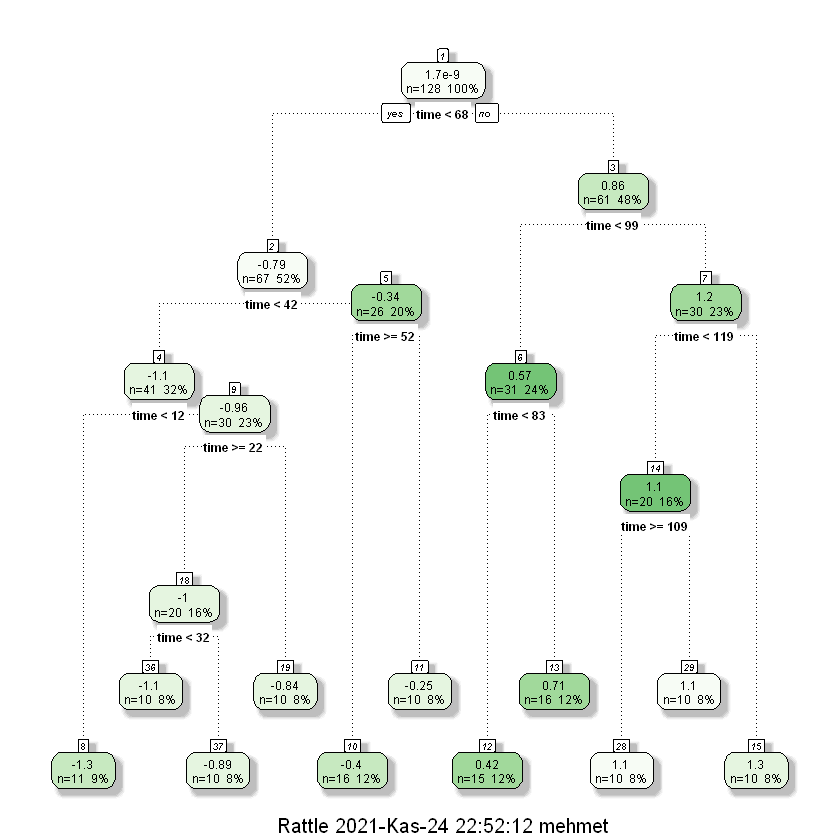

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


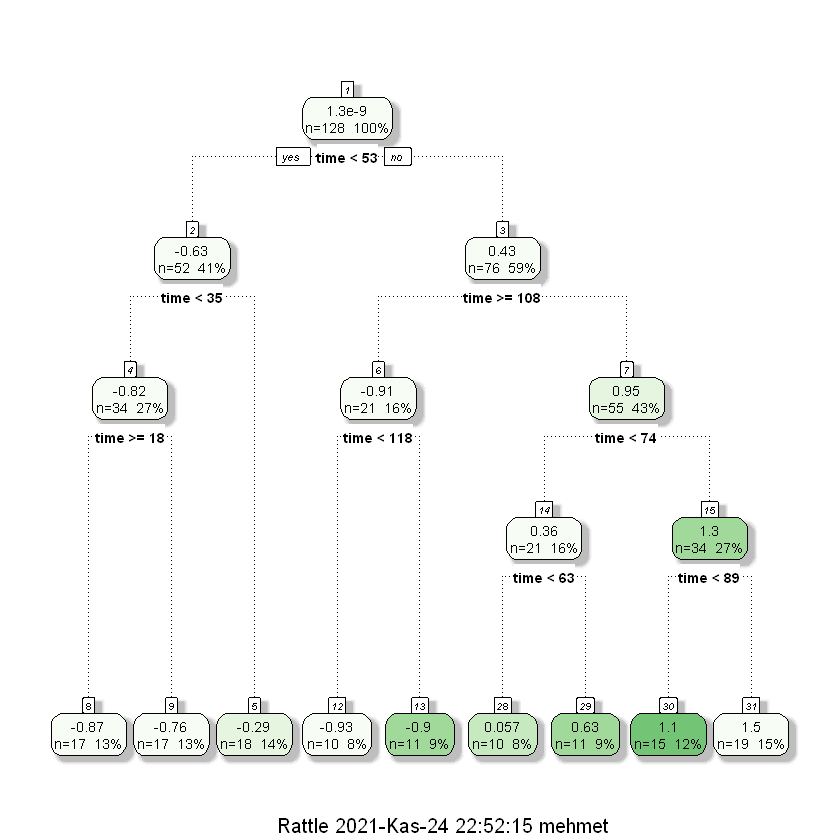

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


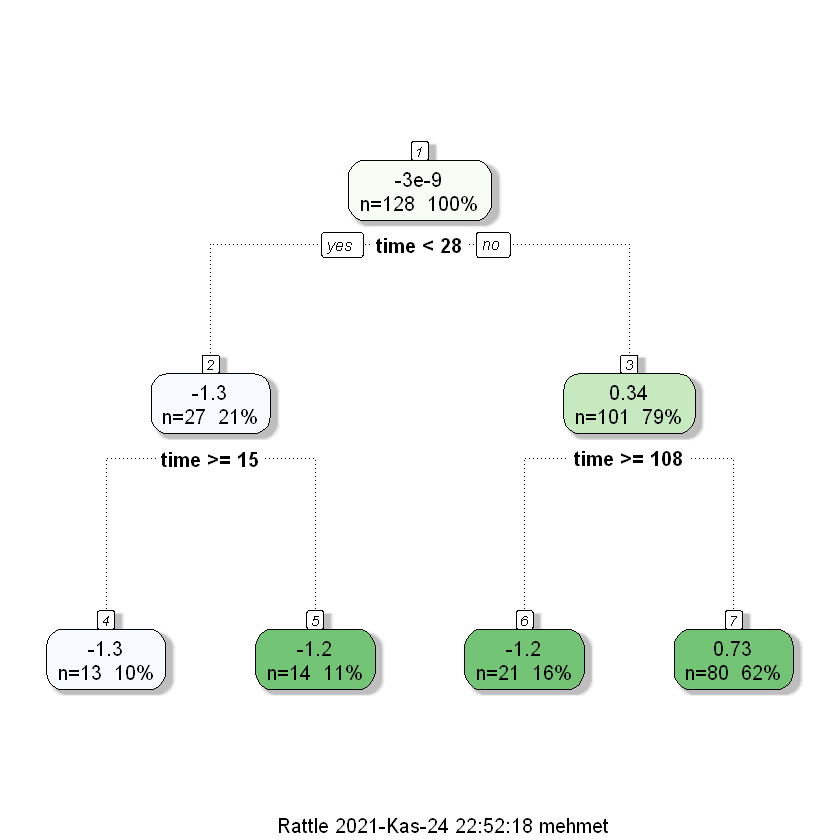

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


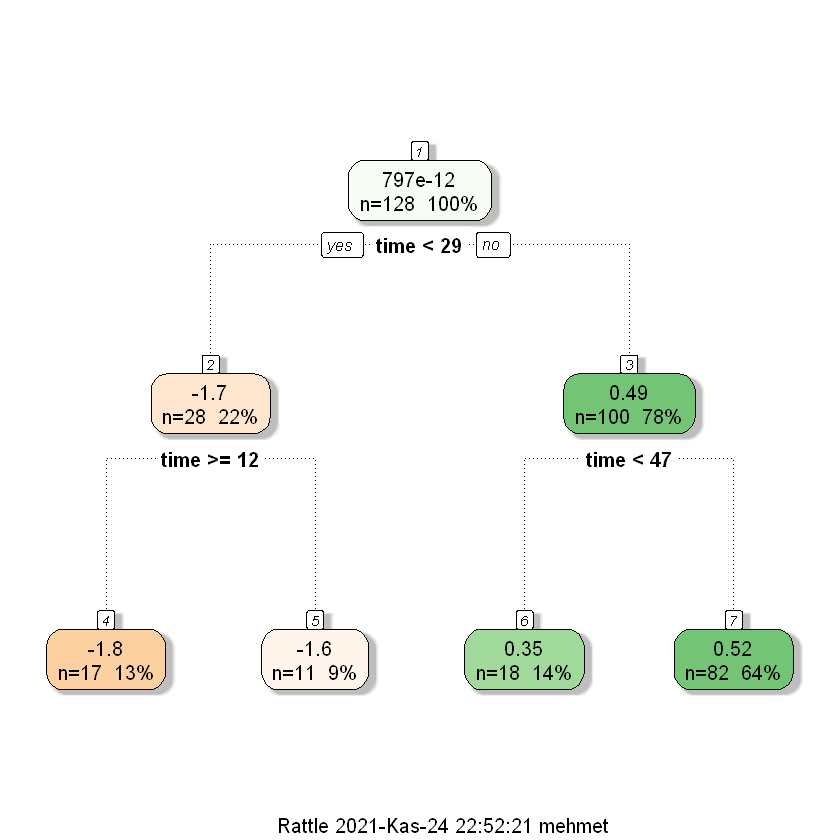

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


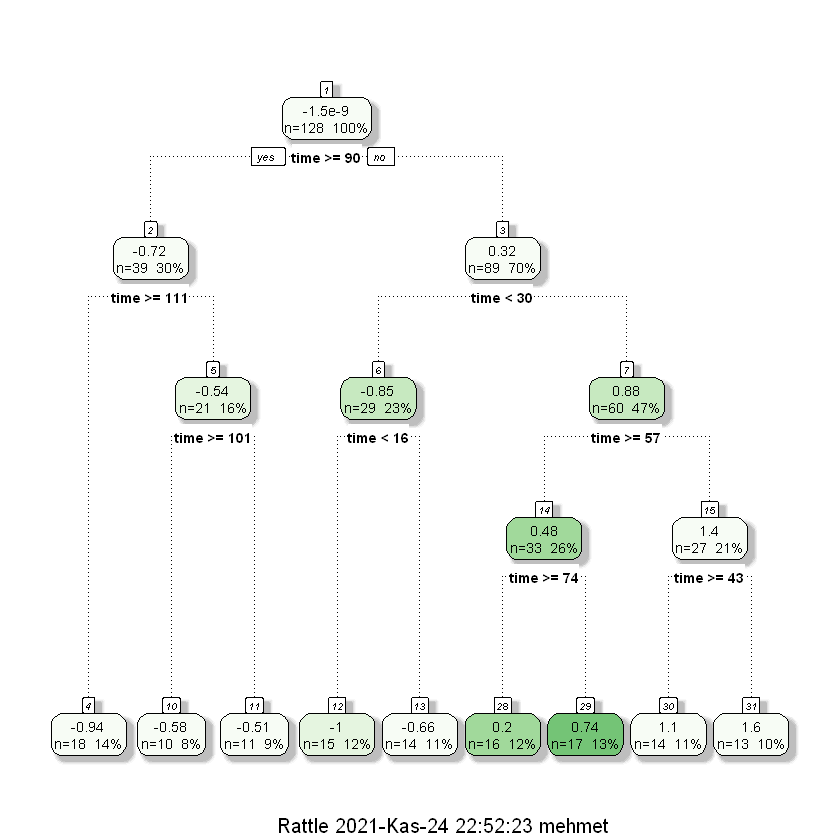

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


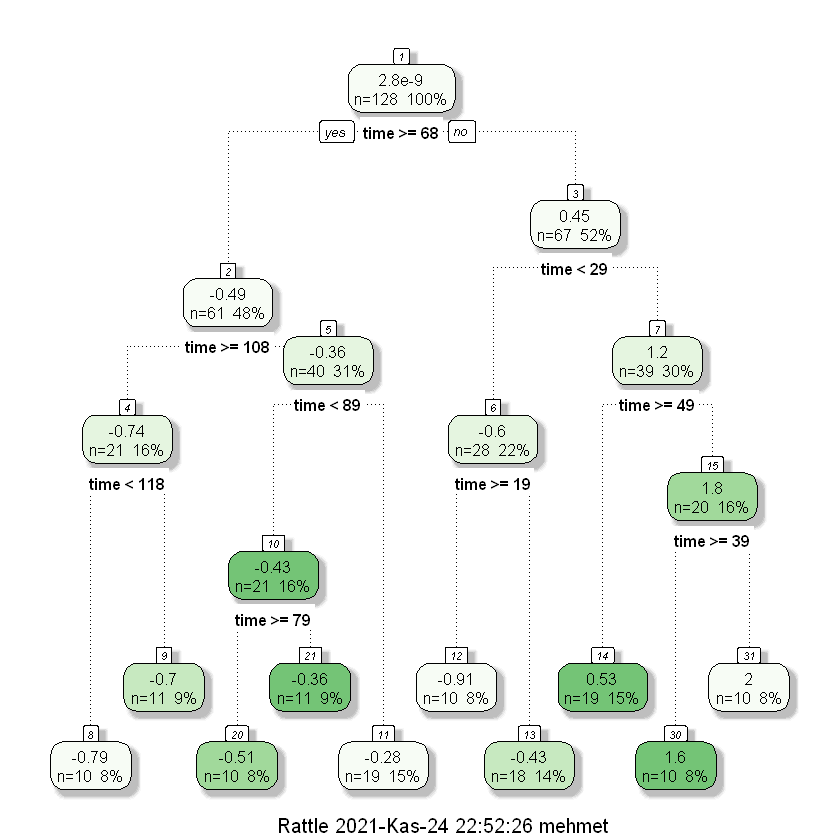

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


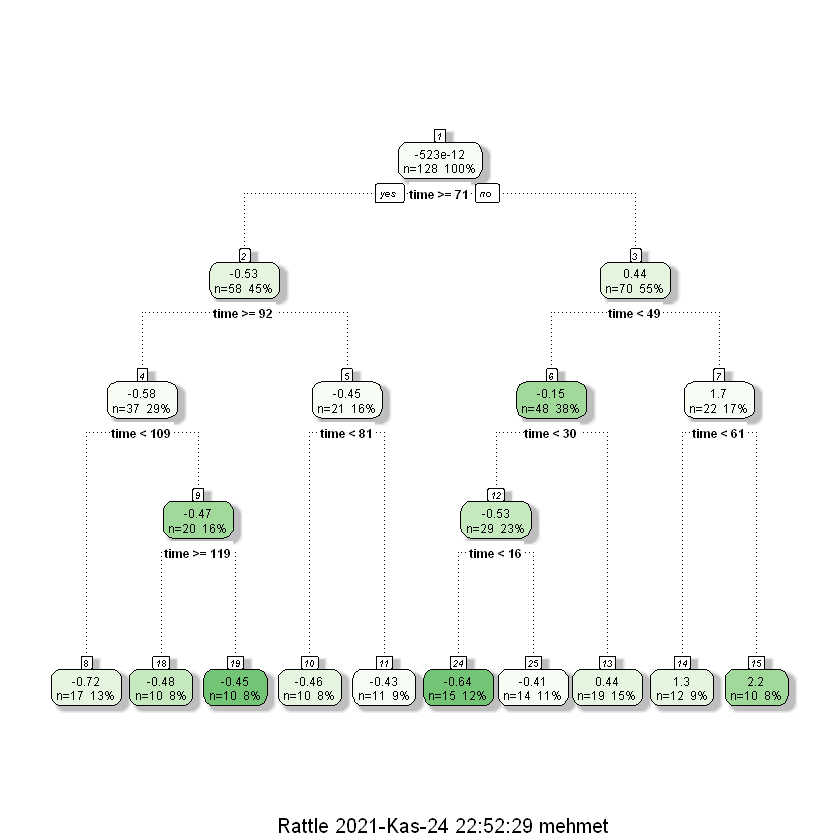

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


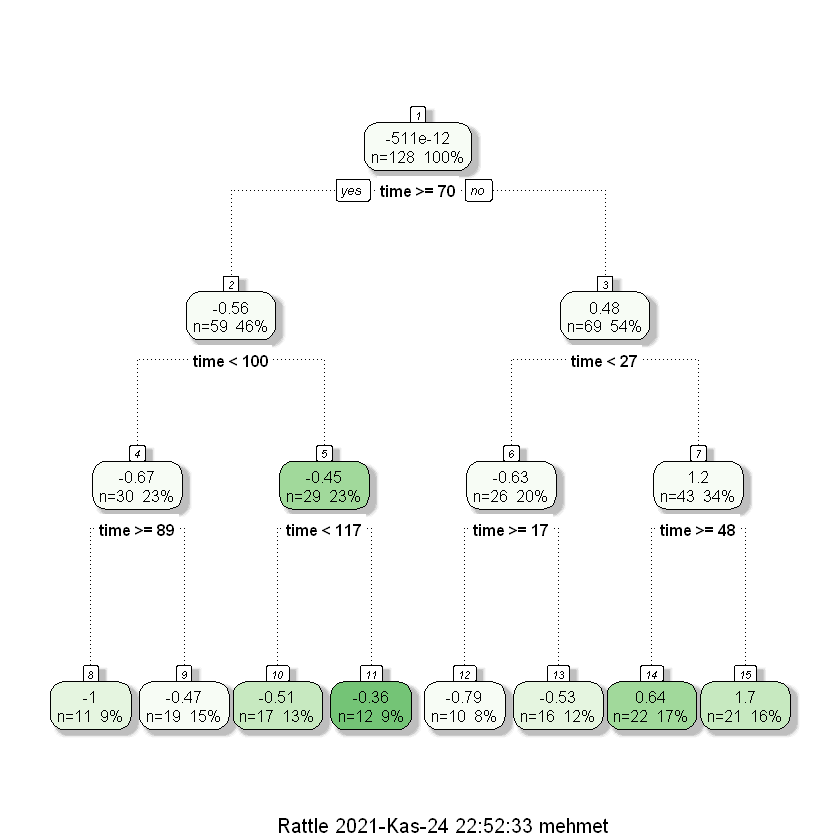

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


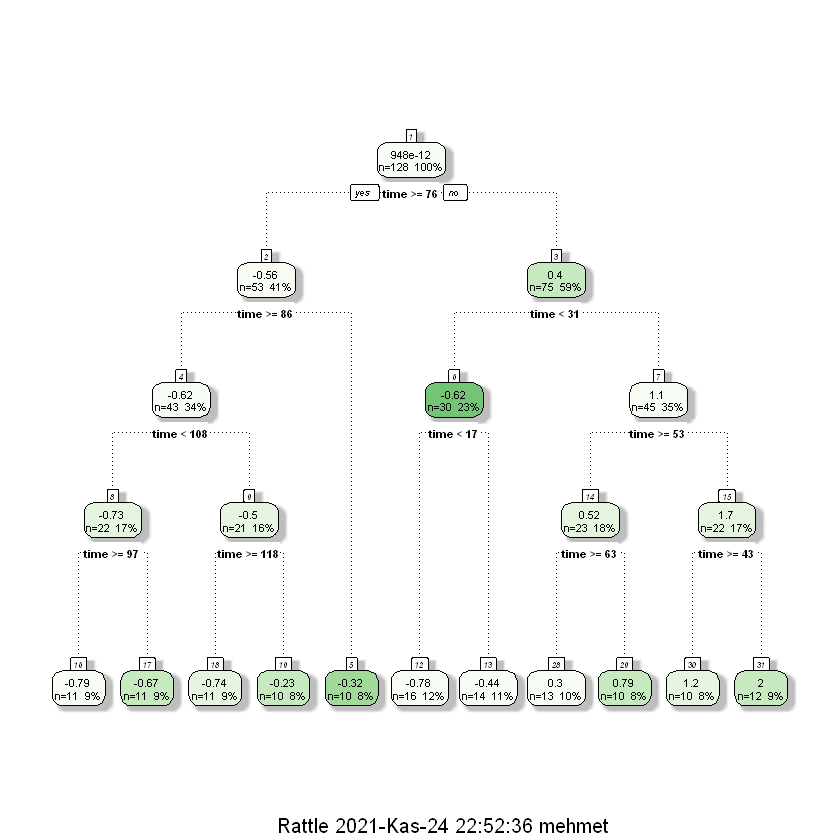

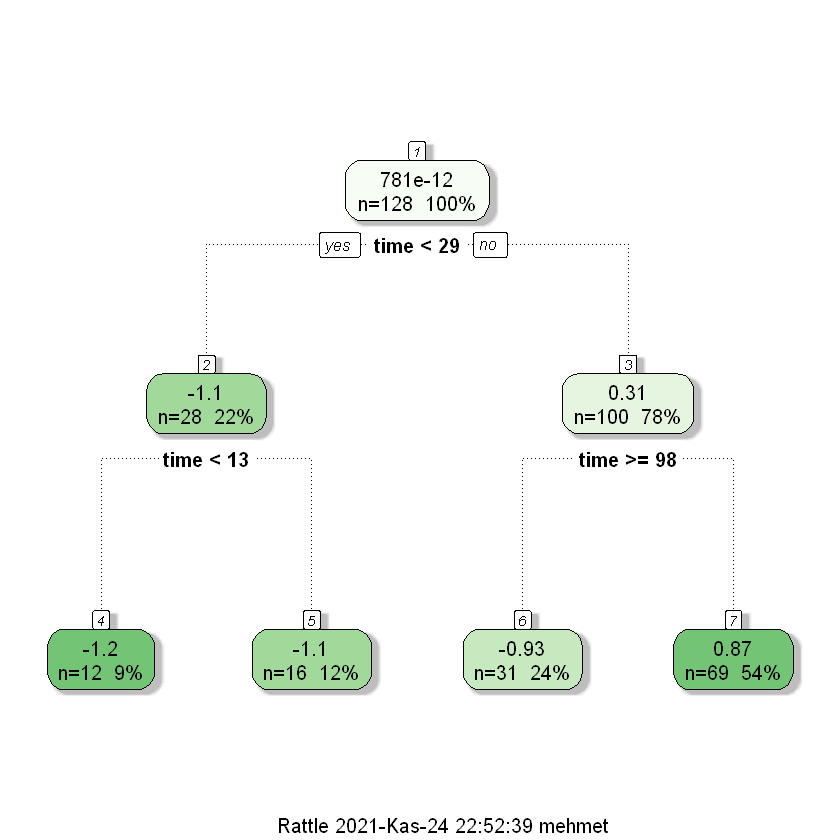

In [7]:

for(i in 1:30){

selected_series=i
selected_dt=traindatalong[id==selected_series]

fl1d=fusedlasso1d(as.numeric(selected_dt$value),)
cv=cv.trendfilter(fl1d,k=10,mode = "lambda")
lambmin=cv$lambda.min
predgenlas=predict.genlasso(fl1d,lambda = lambmin)

genlas1d_values=as.data.table(predgenlas$fit)




tree_fit=rpart(value~time,selected_dt,control=rpart.control(minsplit=20,minbucket=10,cp=0))
tryer=as.data.table(tree_fit$cptable)
optsplit=order(tryer$xerror)[1]
tree_fit=rpart(value~time,selected_dt,control=rpart.control(minsplit=20,minbucket=10,cp=0,maxdepth = optsplit))
fancyRpartPlot(tree_fit)
selected_dt[,tree_rep:=predict(tree_fit,selected_dt)]
selected_dt[,genlasso1d:=genlas1d_values]
data_plot=melt(selected_dt,id.vars='time',measure.vars=c('value','tree_rep','genlasso1d'))


ggplot(data_plot,aes(x=time,y=value,color=variable))+
  geom_line()

selected_dt$glse=(selected_dt$value-selected_dt$genlasso1d)^2
selected_dt$trse=(selected_dt$value-selected_dt$tree_rep)^2
mse_genlasso=sum(selected_dt$glse)/length(selected_dt)
mse_tree=sum(selected_dt$trse)/length(selected_dt)

tree_mse[selected_series,]=mse_tree
genlass_mse[selected_series,]=mse_genlasso

tree_nn[selected_series,]=selected_dt$tree_rep
genlass_nn[selected_series,]=selected_dt$genlasso1d

}

The cell above contains most of the work. It includes cross validation and result values of each series. 

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


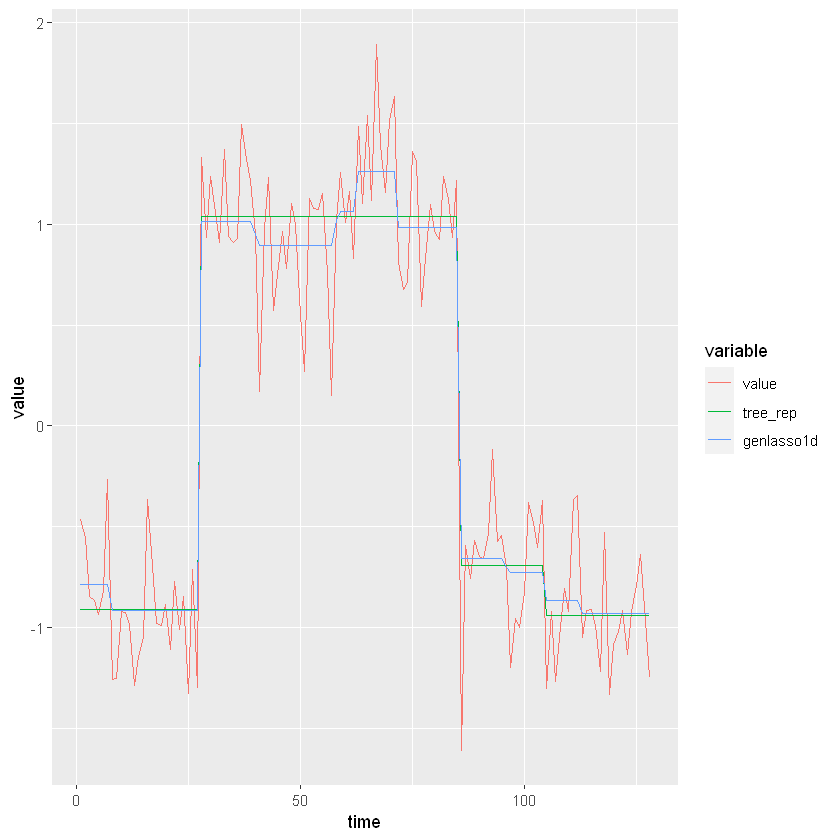

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


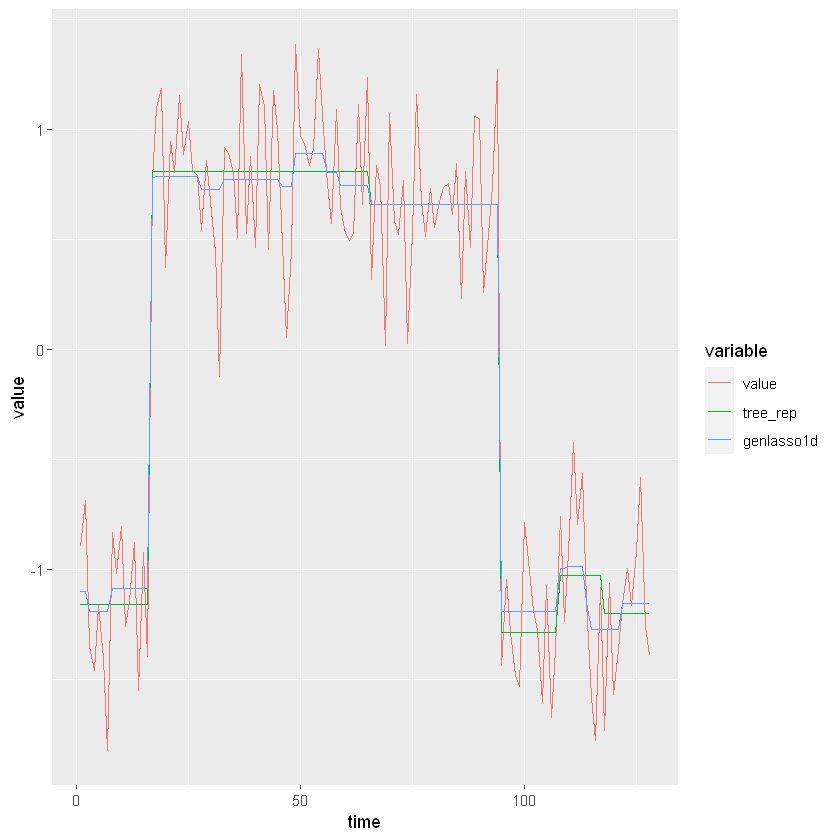

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


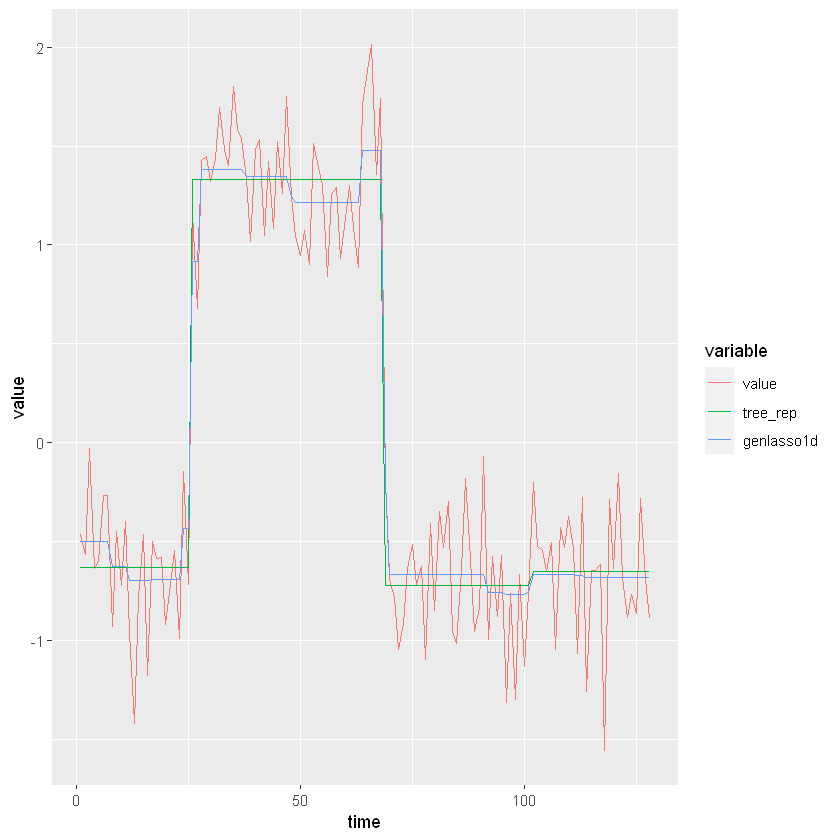

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


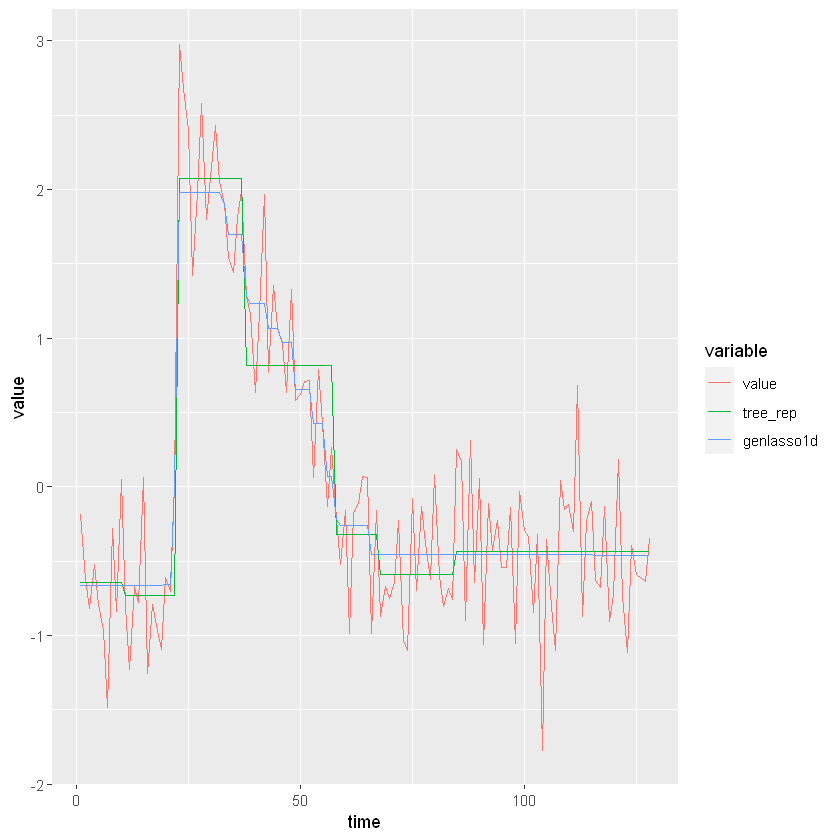

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


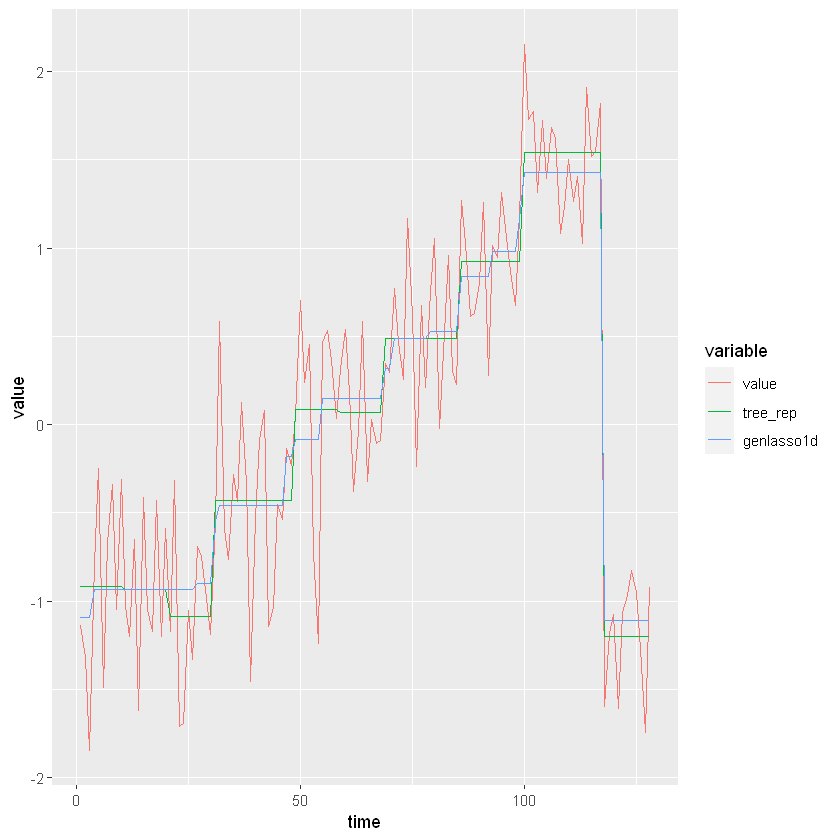

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


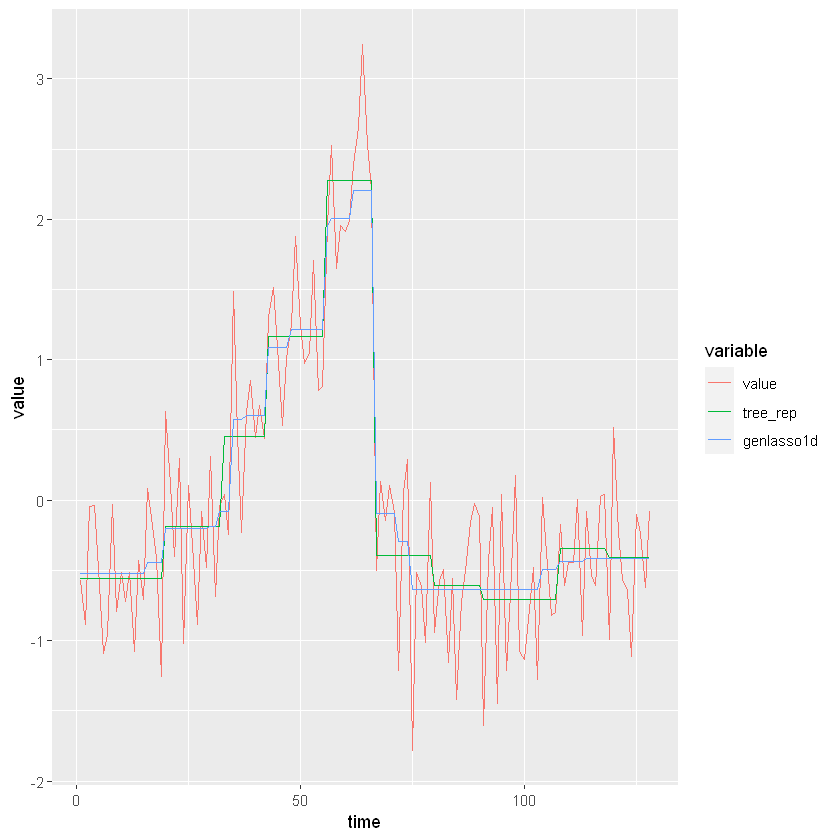

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


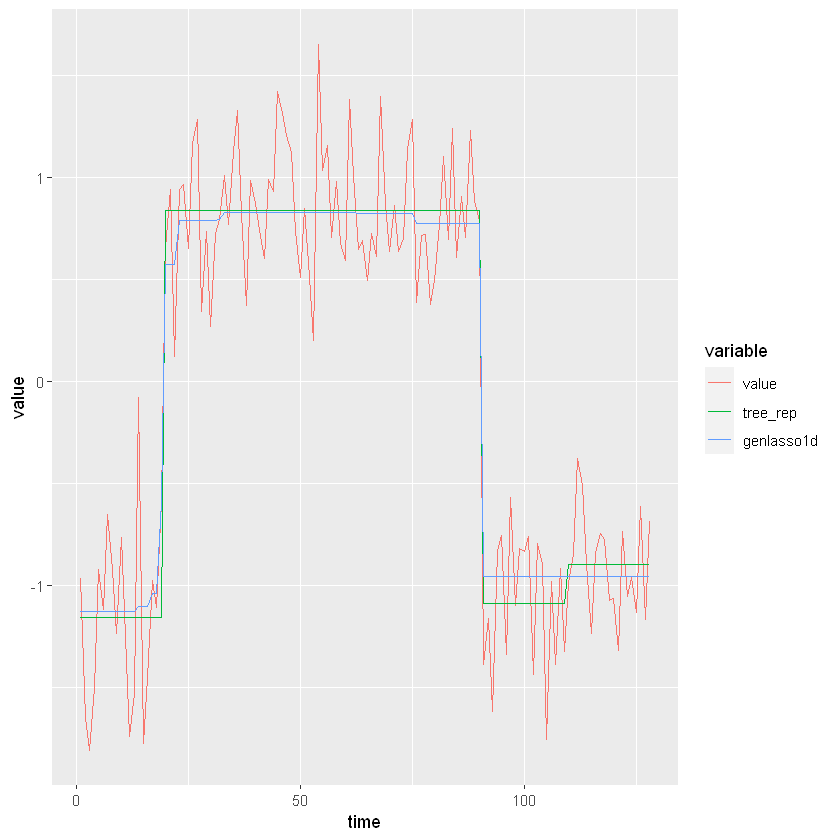

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


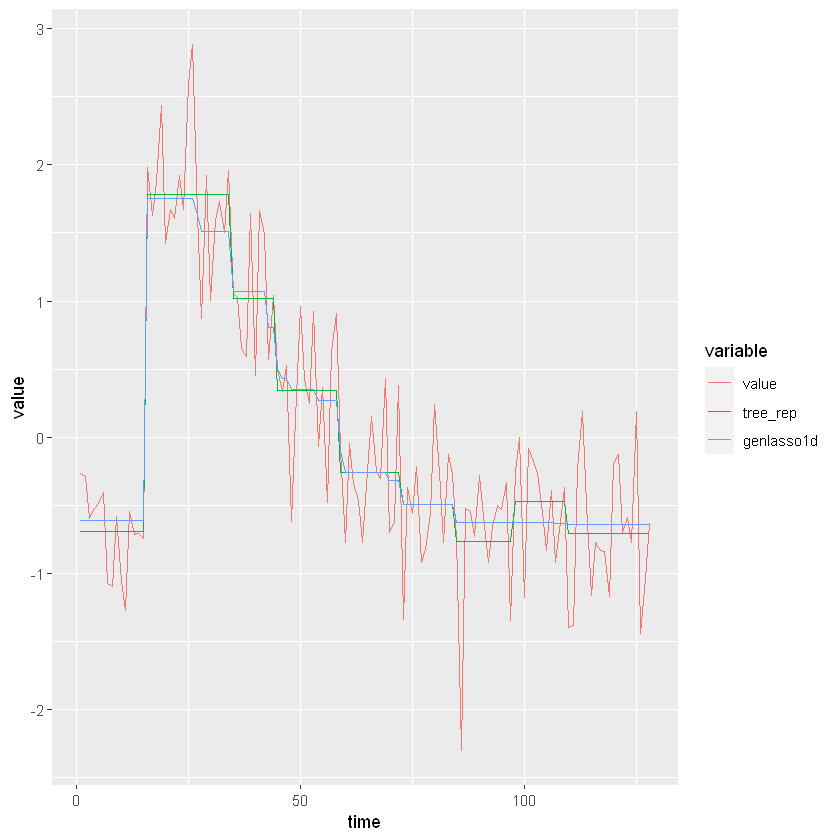

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


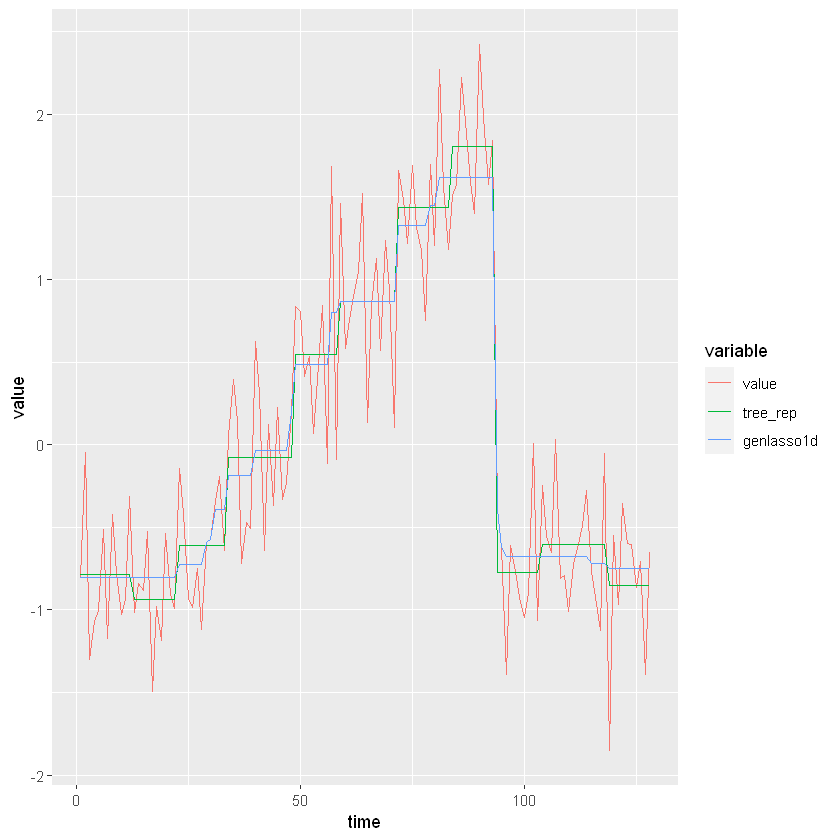

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


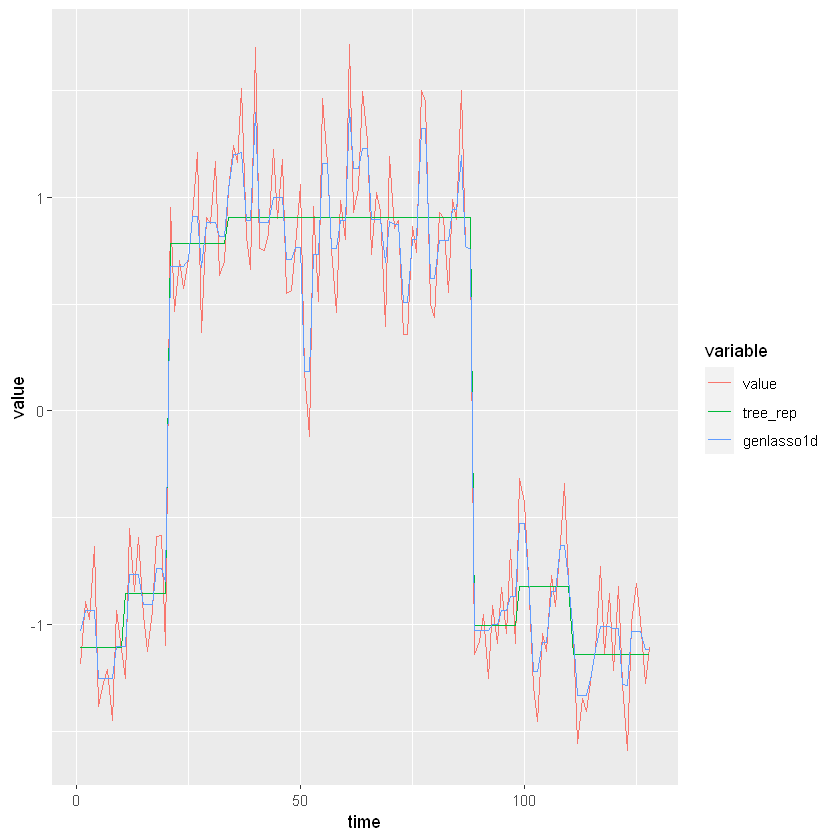

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


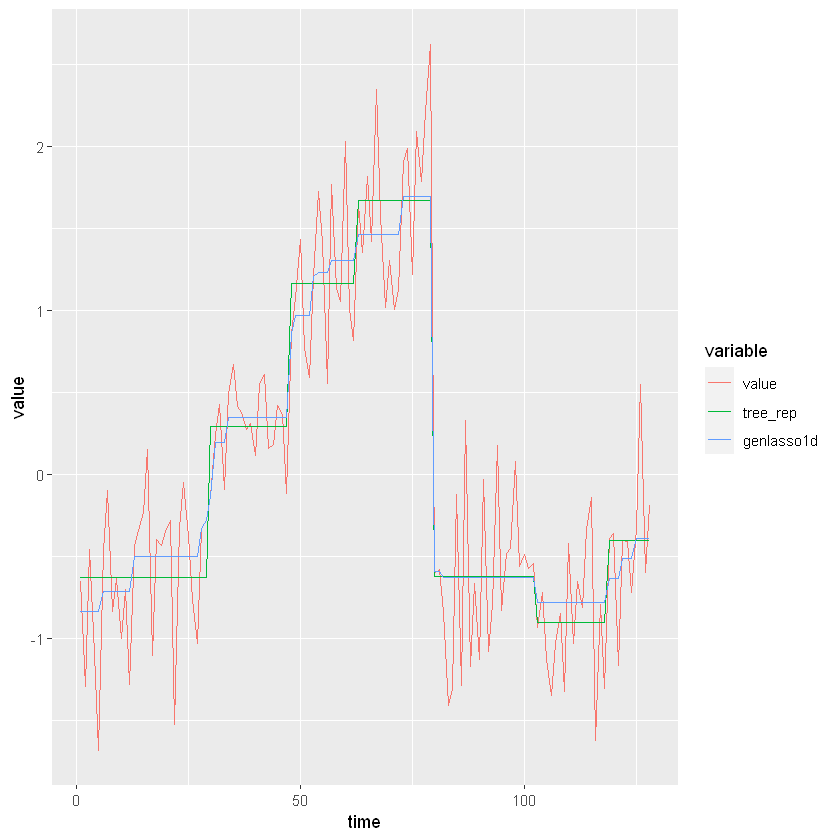

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


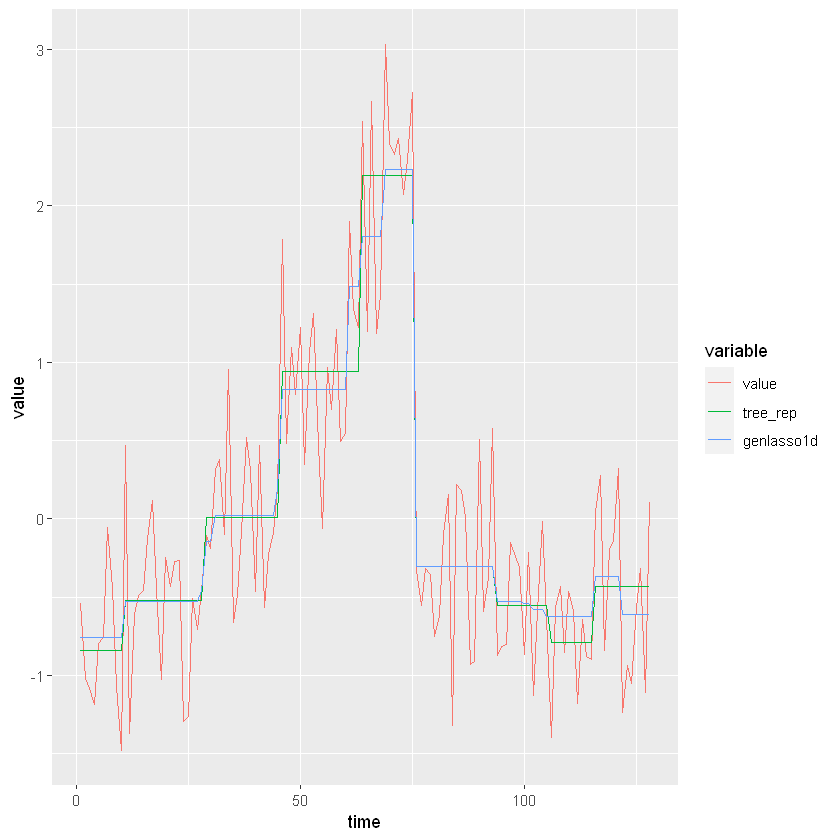

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


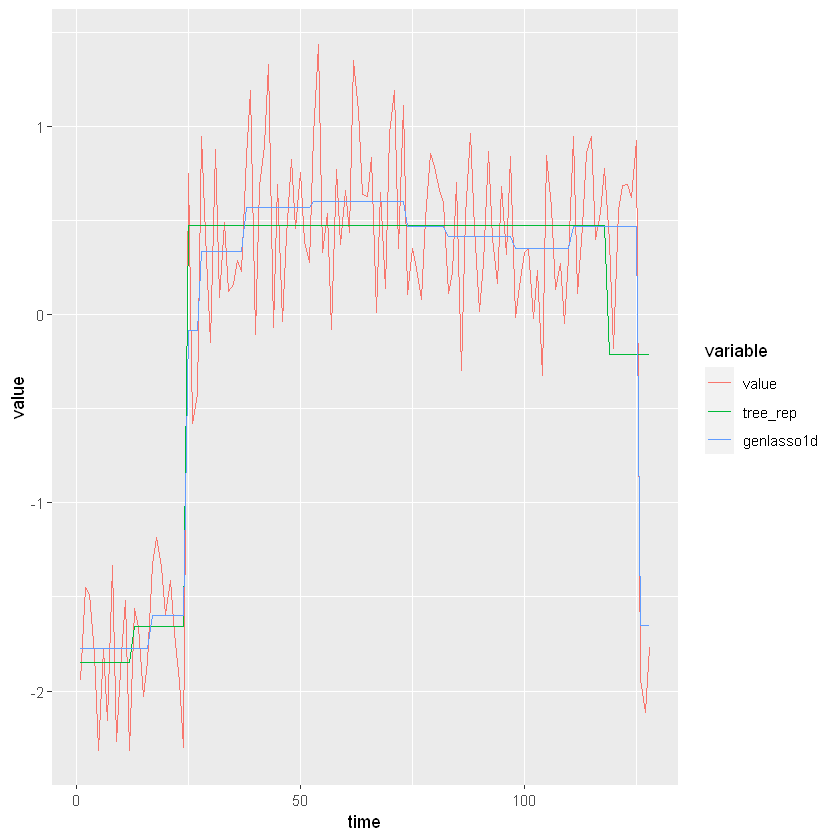

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


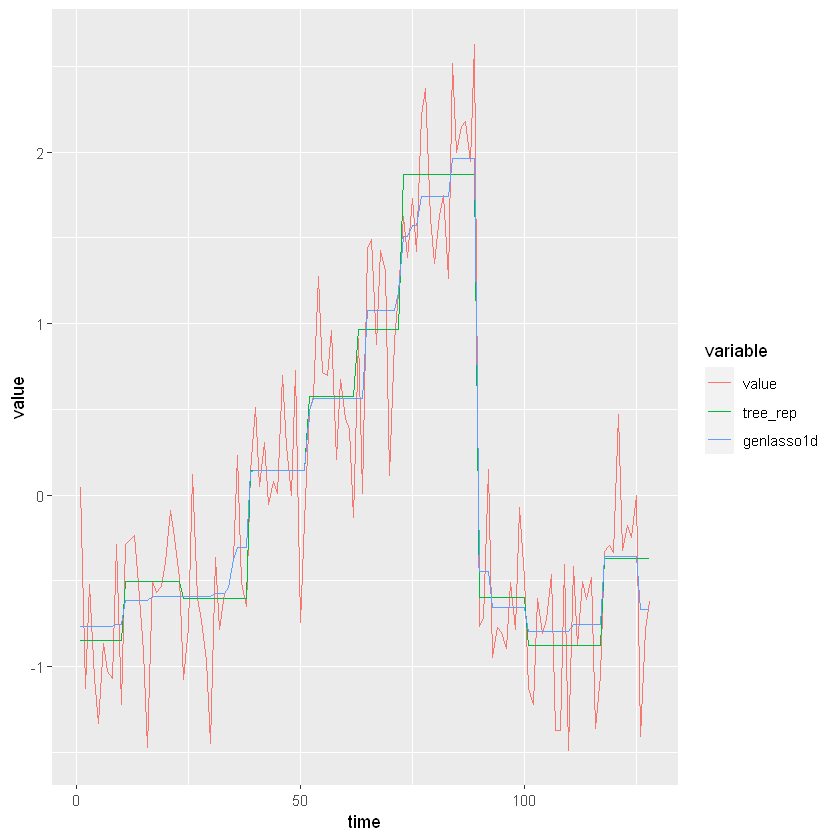

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


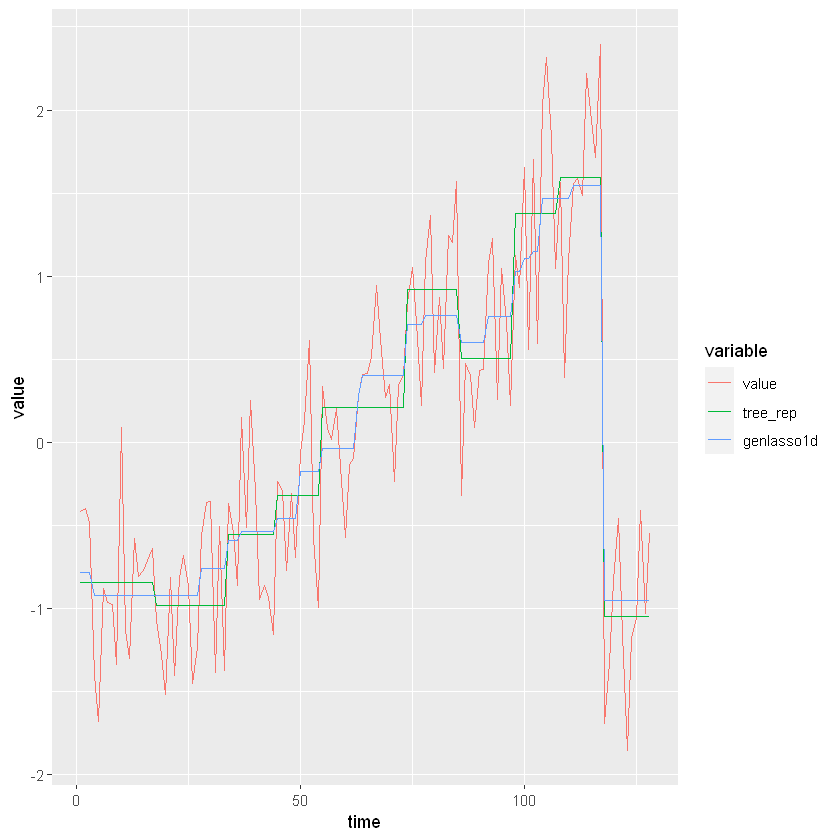

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


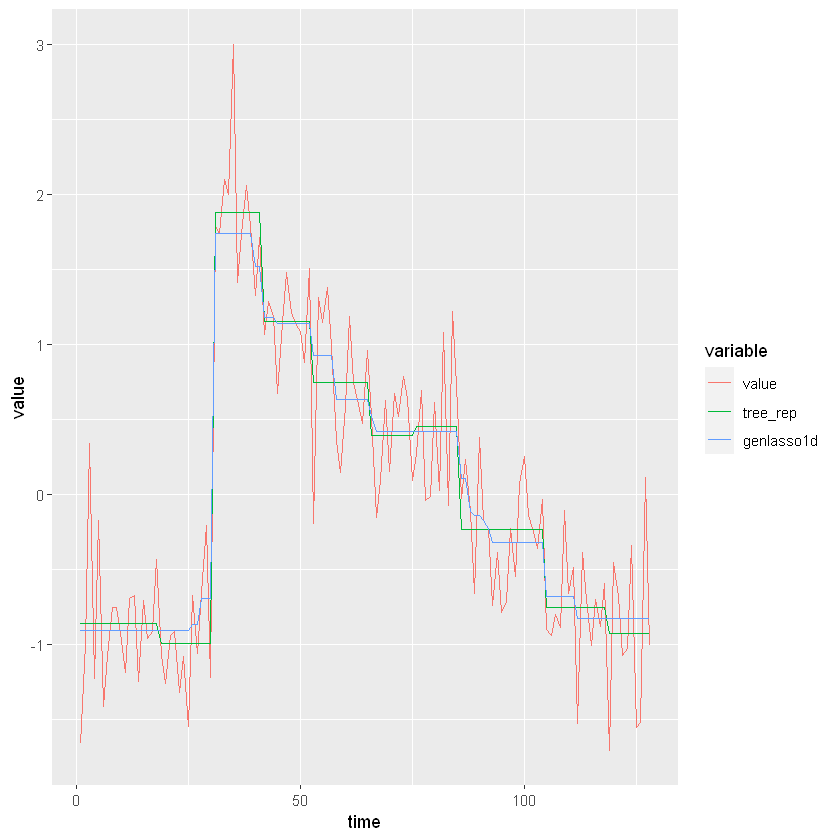

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


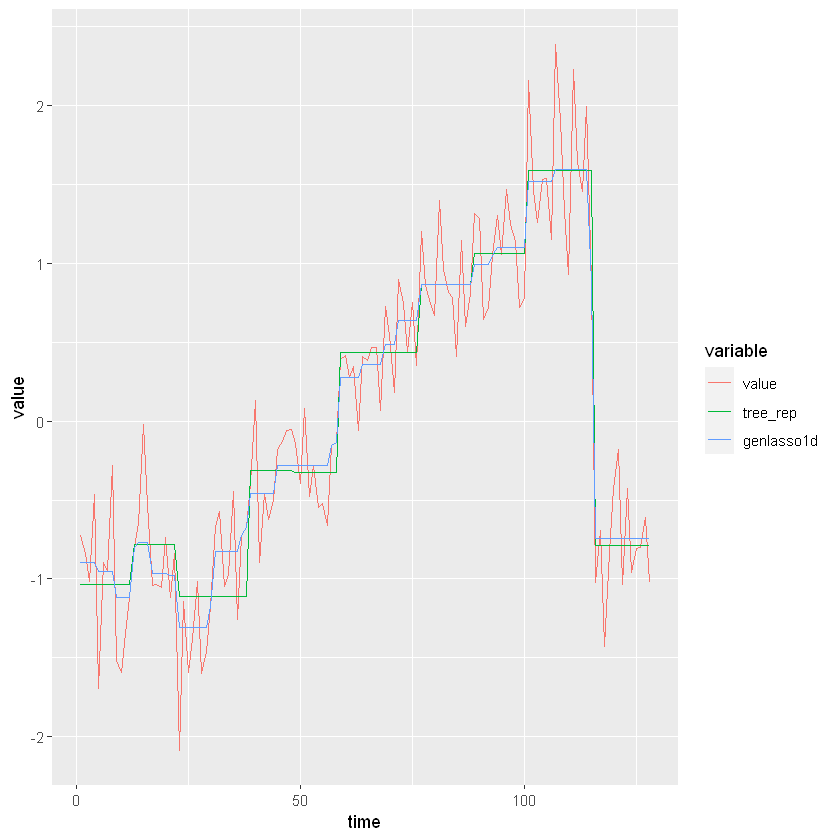

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


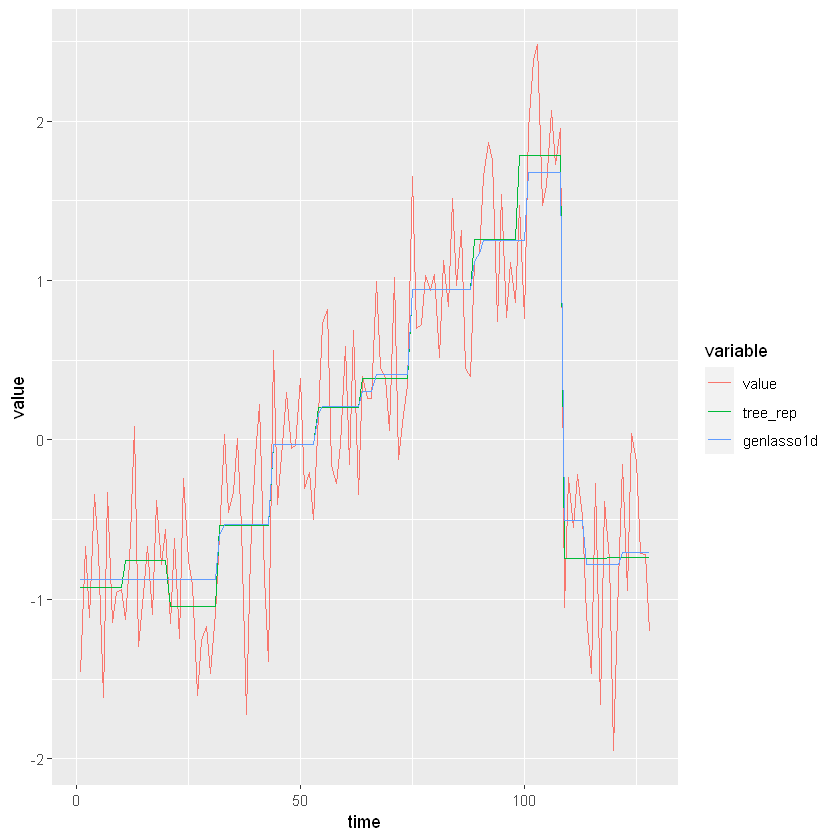

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


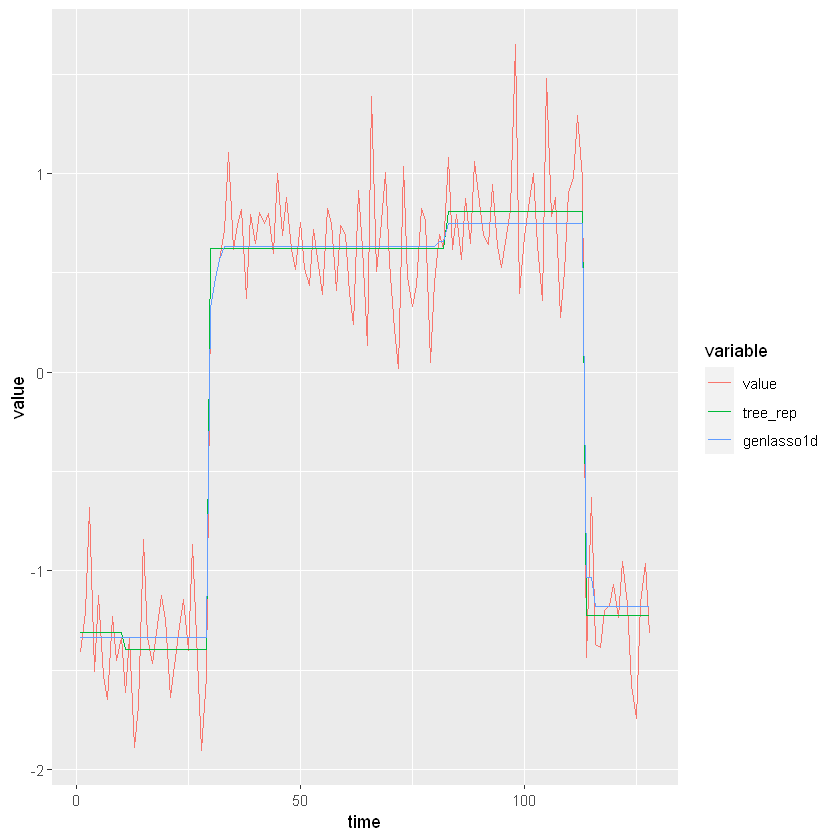

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


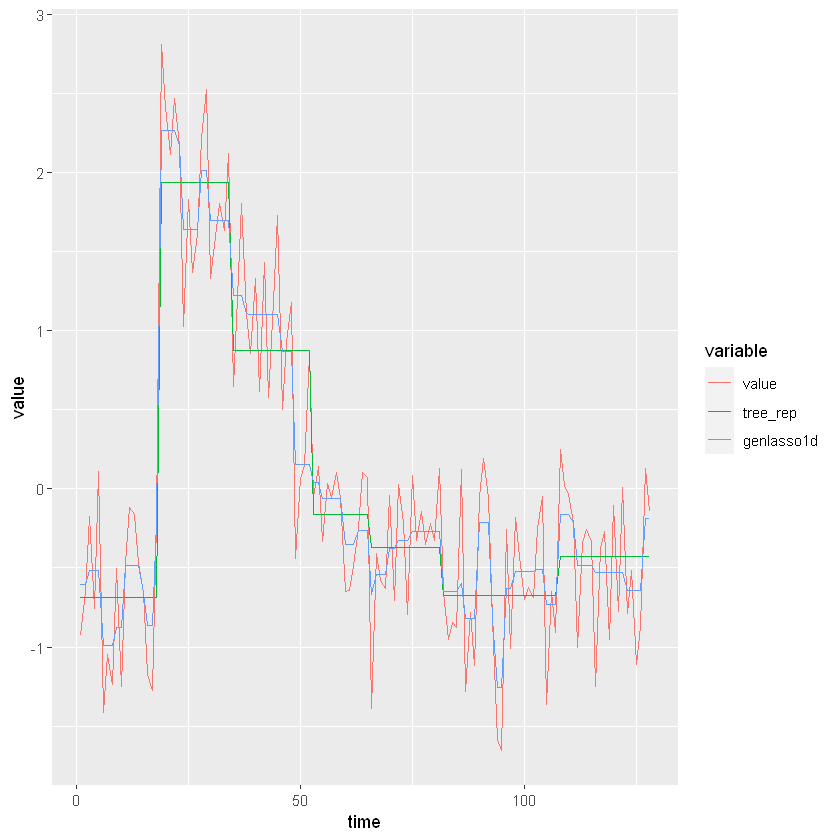

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


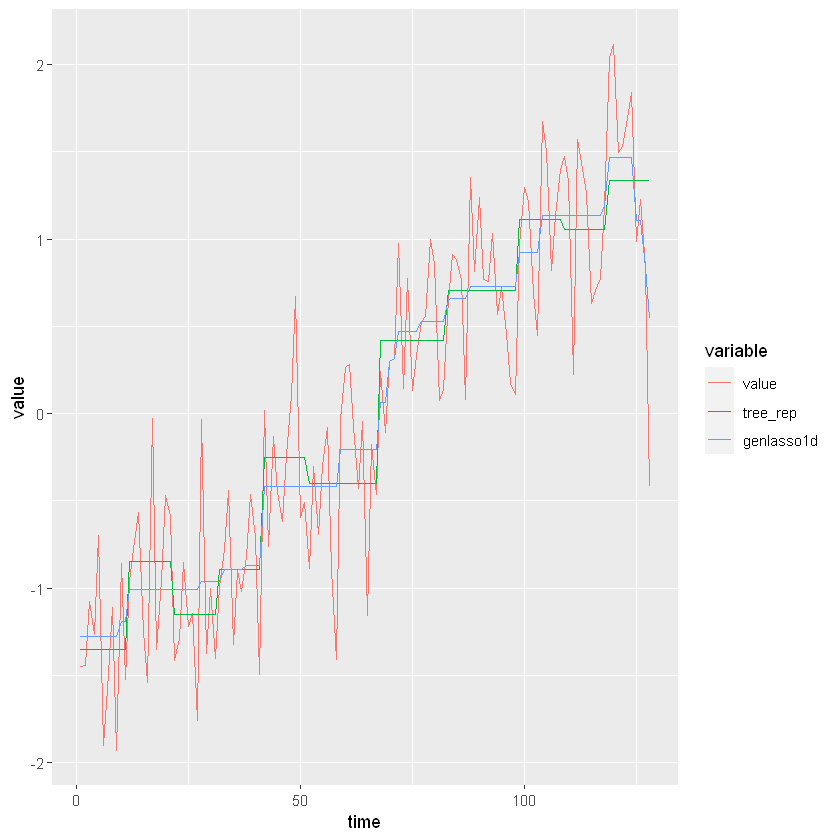

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


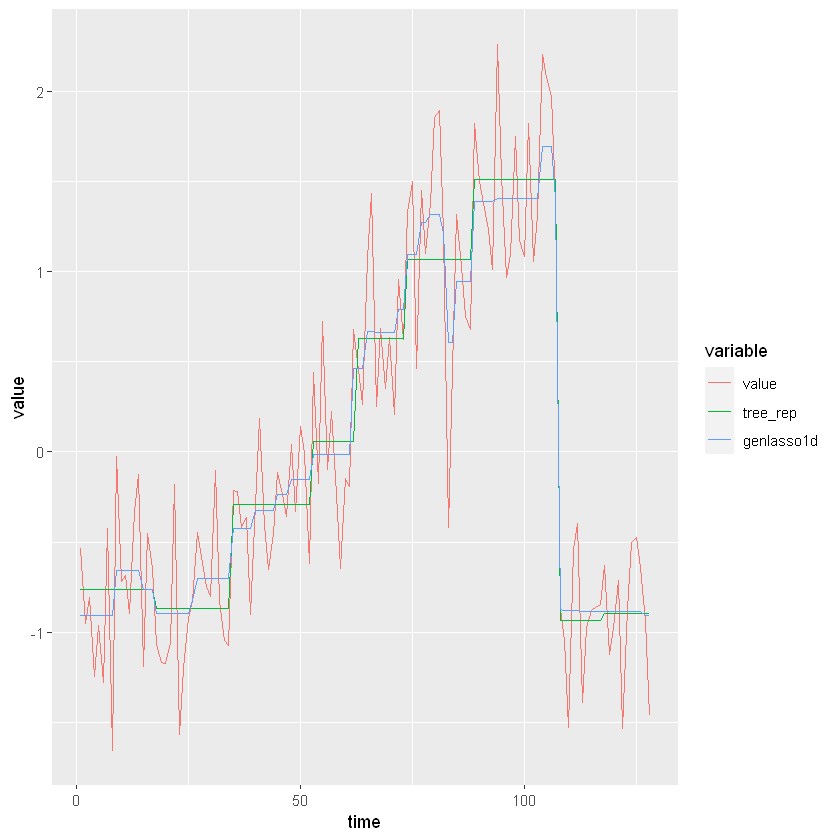

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


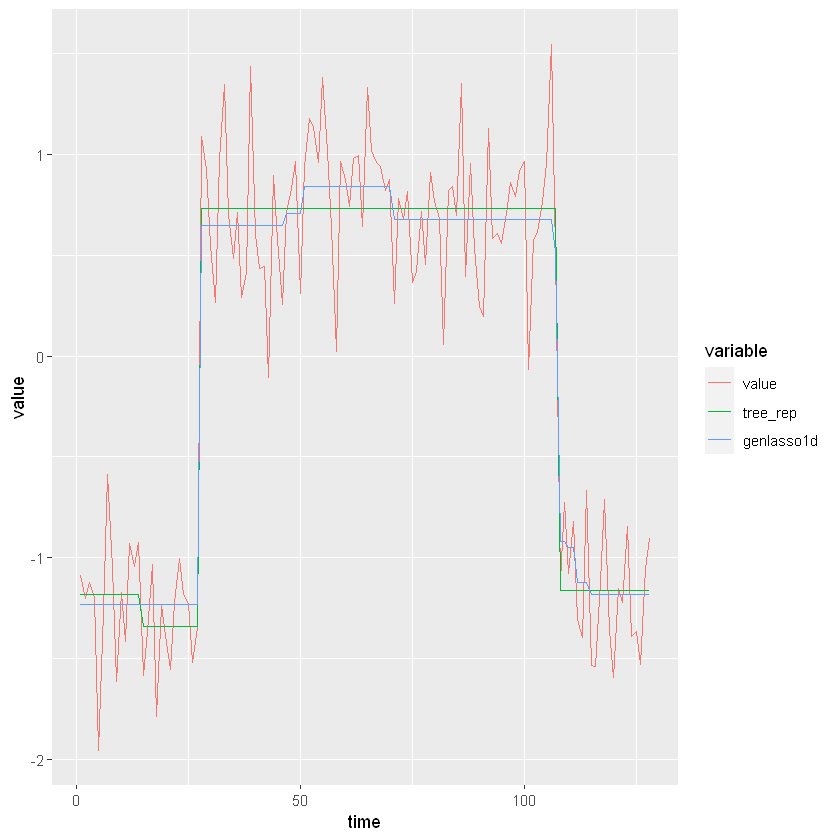

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


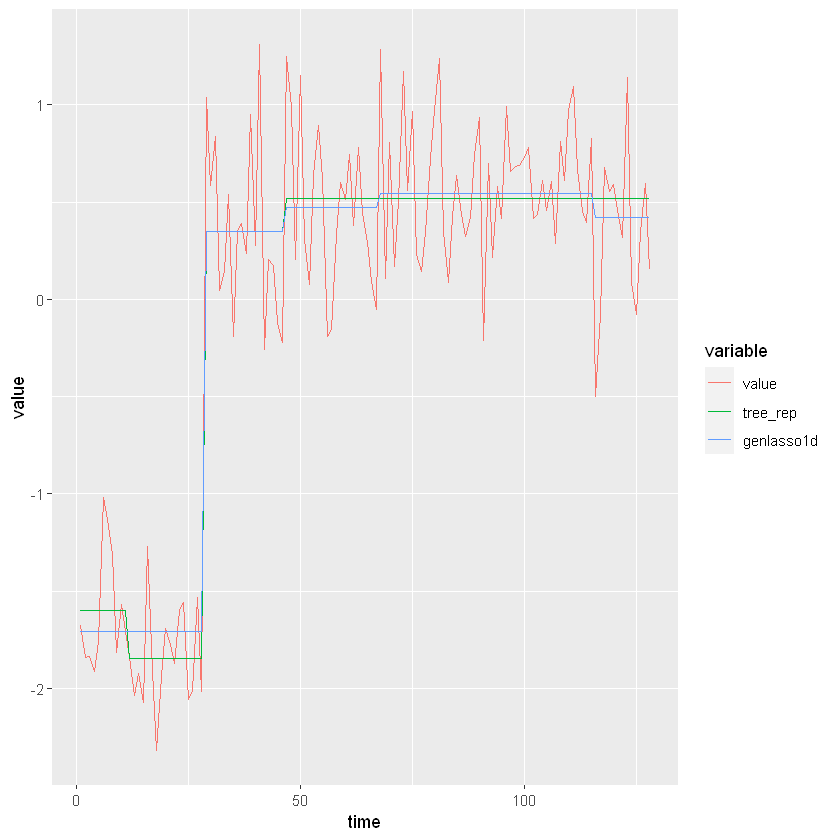

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


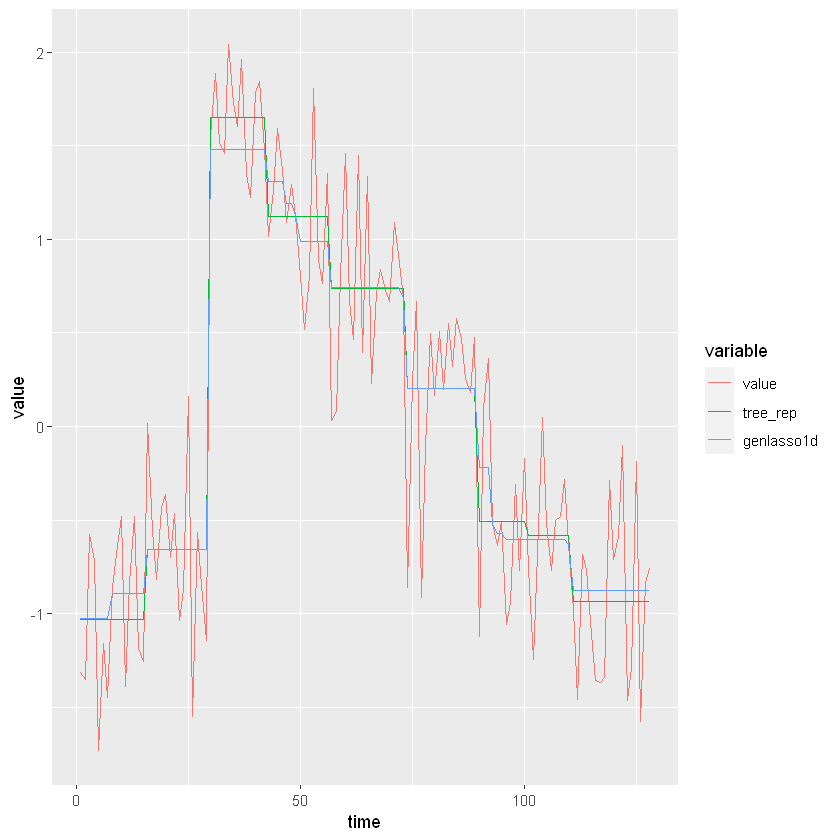

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


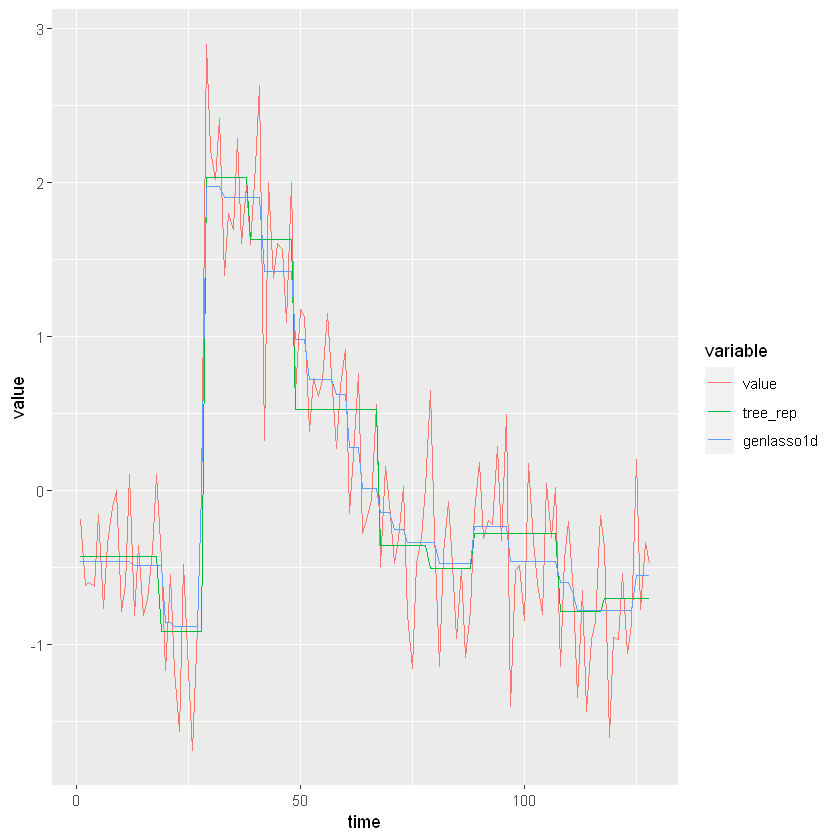

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


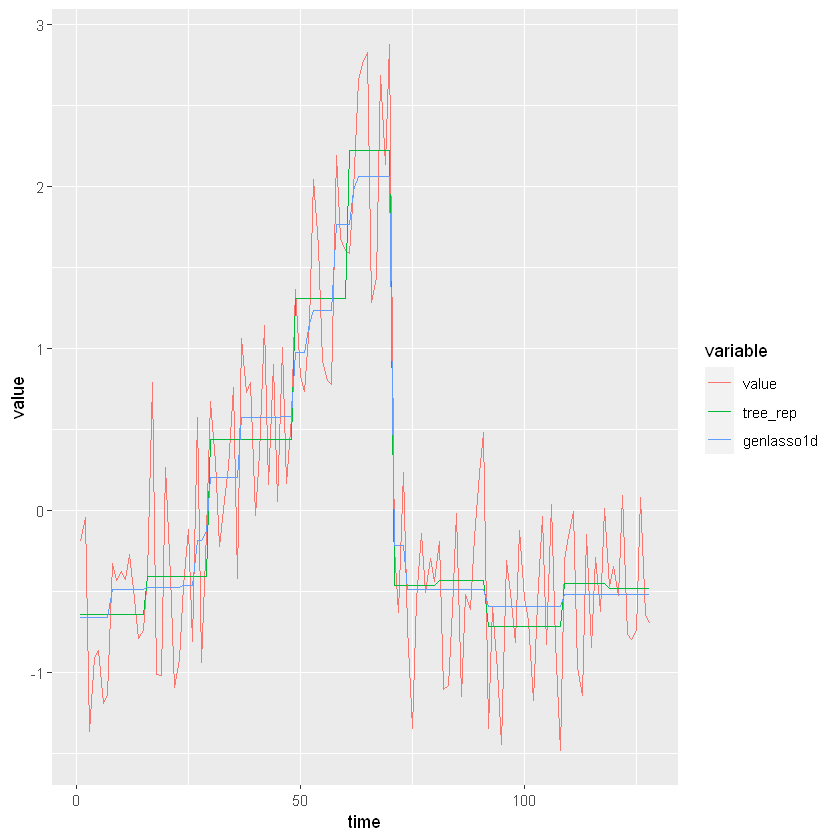

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


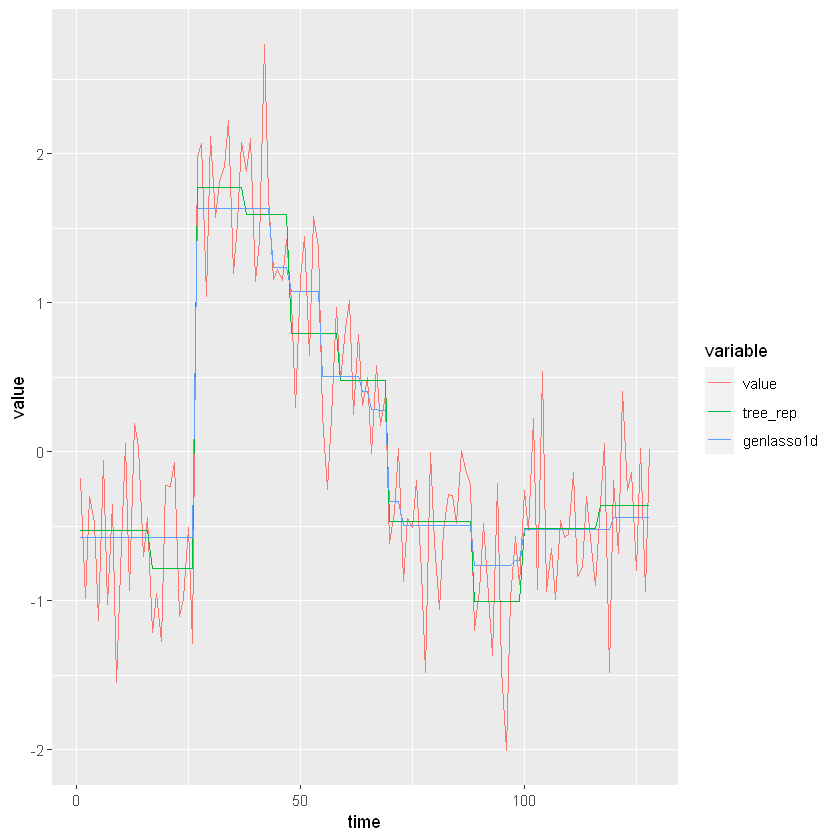

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 


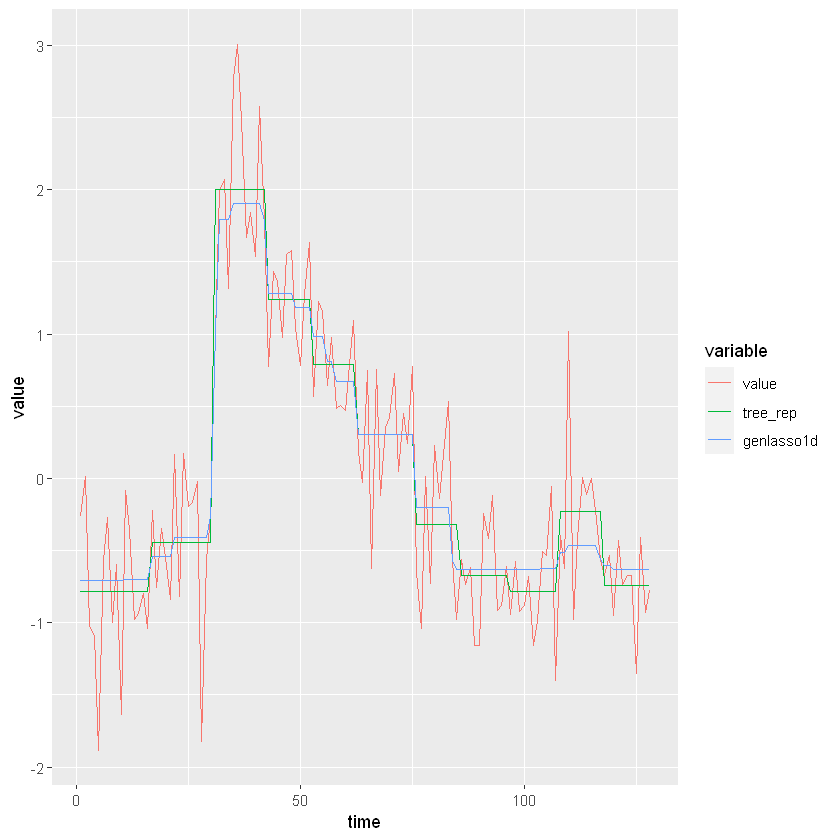

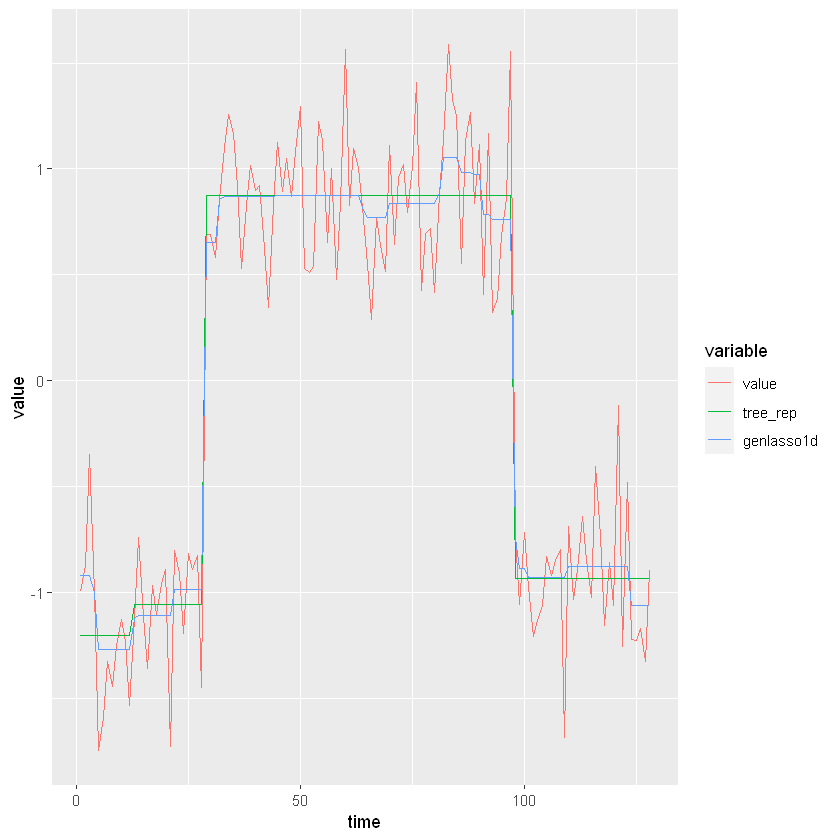

In [10]:

for(i in 1:30){

selected_series=i
selected_dt=traindatalong[id==selected_series]

fl1d=fusedlasso1d(as.numeric(selected_dt$value),)
cv=cv.trendfilter(fl1d,k=10,mode = "lambda")
lambmin=cv$lambda.min
predgenlas=predict.genlasso(fl1d,lambda = lambmin)

genlas1d_values=as.data.table(predgenlas$fit)




tree_fit=rpart(value~time,selected_dt,control=rpart.control(minsplit=20,minbucket=10,cp=0))
tryer=as.data.table(tree_fit$cptable)
optsplit=order(tryer$xerror)[1]
tree_fit=rpart(value~time,selected_dt,control=rpart.control(minsplit=20,minbucket=10,cp=0,maxdepth = optsplit))
selected_dt[,tree_rep:=predict(tree_fit,selected_dt)]
selected_dt[,genlasso1d:=genlas1d_values]
data_plot=melt(selected_dt,id.vars='time',measure.vars=c('value','tree_rep','genlasso1d'))


print(ggplot(data_plot,aes(x=time,y=value,color=variable))+
  geom_line())



}

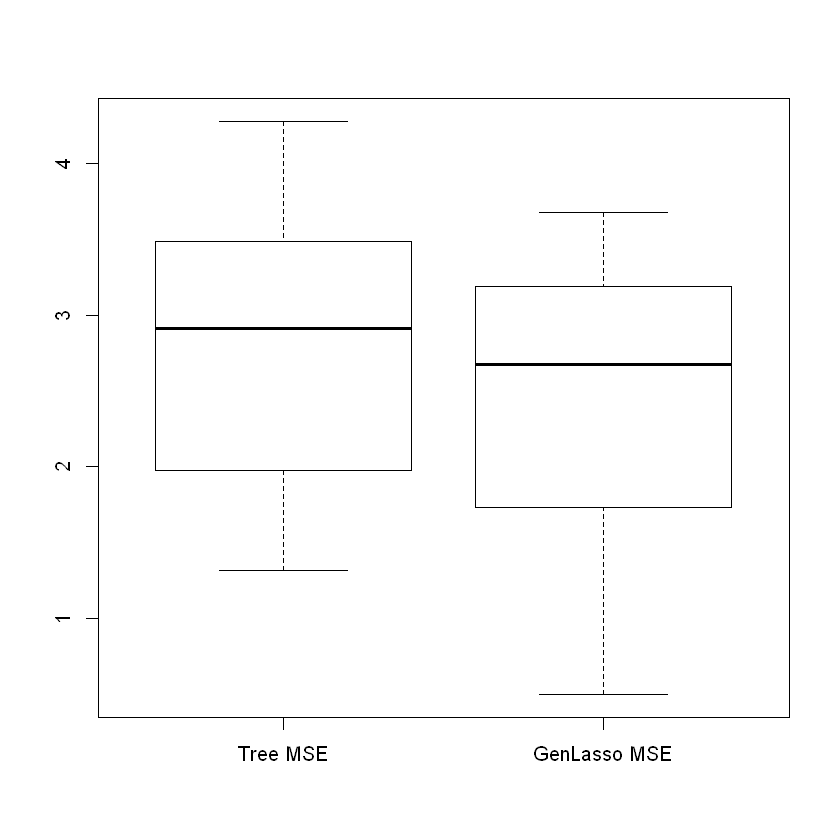

In [11]:

msegraph=cbind(tree_mse,genlass_mse)
msegraph=as.data.frame(msegraph)
setnames(msegraph,'V1','Tree MSE')
setnames(msegraph,'V2','GenLasso MSE')
boxplot(msegraph)


After checking Mean square errors it can be said that "genlasso" approach performed better than "tree". 

In [12]:

large_number=1000

tree_distance_matrix=dist(tree_nn)
tree_distance_matrix=as.matrix(tree_distance_matrix)
diag(tree_distance_matrix)=large_number

genlass_distance_matrix=dist(genlass_nn)
genlass_distance_matrix=as.matrix(genlass_distance_matrix)
diag(genlass_distance_matrix)=large_number

tree_neighborhood=order(tree_distance_matrix[1,]) 
tree_neighborhood

tree_neighbor=tree_neighborhood[1] 
tree_prediction=trainclass[tree_neighbor]
tree_neighborhood=apply(tree_distance_matrix,1,order) 
tree_predicted=trainclass[tree_neighborhood[1,]]

table(trainclass$V1,tree_predicted$V1)


tree_acc=sum(trainclass$V1==tree_predicted$V1)/length(tree_predicted$V1)
print(tree_acc)

genlass_neighborhood=order(genlass_distance_matrix[1,]) 
genlass_neighborhood

genlass_neighbor=genlass_neighborhood[1] 
genlass_prediction=trainclass[genlass_neighbor]
genlass_neighborhood=apply(genlass_distance_matrix,1,order) 
genlass_predicted=trainclass[genlass_neighborhood[1,]]

table(trainclass$V1,genlass_predicted$V1)


genlass_acc=sum(trainclass$V1==genlass_predicted$V1)/length(genlass_predicted$V1)
print(genlass_acc)


[1] 25 10 16 30  7 11 29 23  2 12 28 27 26  3 14  6 13  9 19 24  4 20  8 22 18
[26] 15  5 17 21  1

   
     1  2  3
  1  8  0  2
  2  1 11  0
  3  1  0  7

[1] 0.8666667


[1] 25 16 10  7 30 11 29 23 12 27  2  3 28 26 14  6  9 19 13 24  4  8 20 22 18
[26] 15  5 17 21  1

   
     1  2  3
  1  8  0  2
  2  0 12  0
  3  0  0  8

[1] 0.9333333


The same result can also be observed in the predictions. Genlasso performed significantly better. However, this doesn't mean that tree approach isn't useful for this study. Because the raw prediction success is 0.83333 (can be seen from the class notes). 